In [1]:
import numpy as np
import nashpy as nash
import matplotlib.pyplot as plt
import timeit
import random
from math import exp,sqrt,pi,e
from scipy.optimize import curve_fit

In [2]:
#part1 - non-cooperation - nash equilibria
player1 = np.array([[2,10],[0,8]])#first player
player2 = np.array([[2,0],[10,8]]) #second
game = nash.Game(player1,player2)
global N , L
N = 100
L = 10

In [218]:
game

Bi matrix game with payoff matrices:

Row player:
[[ 2 10]
 [ 0  8]]

Column player:
[[ 2  0]
 [10  8]]

In [25]:
def play(payoffi): #part 1 (without jumping) non-cooperation
    payoff = payoffi
    beta = 1
    s = np.zeros((L,L))
    for i in range(0,L):
        for j in range(0,L):
            if i == 0 and j != 0 and j != L-1:
                p1 = game[strategy[i][j][:],strategy[L-1][j][:]] #up
                payoff[i][j] = p1[0]
                payoff[L-1][j] = p1[1]
                p2 = game[strategy[i][j][:],strategy[i][j+1][:]]#right
                payoff[i][j] = p2[0]
                payoff[i][j+1] = p2[1]
                p3 = game[strategy[i][j][:],strategy[i+1][j][:]]#down
                payoff[i][j] = p3[0]
                payoff[i+1][j] = p3[1]
                p4 = game[strategy[i][j][:],strategy[i][j-1][:]]#left
                payoff[i][j] = p4[0]
                payoff[i][j-1] = p4[1]
                if j == 0:
                    p1 = game[strategy[i][j][:],strategy[L-1][j][:]] #up
                    payoff[i][j] = p1[0]
                    payoff[L-1][j] = p1[1]
                    p2 = game[strategy[i][j][:],strategy[i][j+1][:]]#right
                    payoff[i][j] = p2[0]
                    payoff[i][j+1] = p2[1]
                    p3 = game[strategy[i][j][:],strategy[i+1][j][:]]#down
                    payoff[i][j] = p3[0]
                    payoff[i+1][j] = p3[1]
                    p4 = game[strategy[i][j][:],strategy[i][L-1][:]]#left
                    payoff[i][j] = p4[0]
                    payoff[i][L-1] = p4[1]
                elif j == L-1:
                    p1 = game[strategy[i][j][:],strategy[L-1][j][:]] #up
                    payoff[i][j] = p1[0]
                    payoff[L-1][j] = p1[1]
                    p2 = game[strategy[i][j][:],strategy[i][0][:]]#right
                    payoff[i][j] = p2[0]
                    payoff[i][0] = p2[1]
                    p3 = game[strategy[i][j][:],strategy[i+1][j][:]]#down
                    payoff[i][j] = p3[0]
                    payoff[i+1][j] = p3[1]
                    p4 = game[strategy[i][j][:],strategy[i][j-1][:]]#left
                    payoff[i][j] = p4[0]
                    payoff[i][j-1] = p4[1]
                
            if i == L-1 and j != 0 and j != L-1:
                p1 = game[strategy[i][j][:],strategy[i-1][j][:]] #up
                payoff[i][j] = p1[0]
                payoff[i-1][j] = p1[1]
                p2 = game[strategy[i][j][:],strategy[i][j+1][:]]#right
                payoff[i][j] = p2[0]
                payoff[i][j+1] = p2[1]
                p3 = game[strategy[i][j][:],strategy[0][j][:]]#down
                payoff[i][j] = p3[0]
                payoff[0][j] = p3[1]
                p4 = game[strategy[i][j][:],strategy[i][j-1][:]]#left
                payoff[i][j] = p4[0]
                payoff[i][j-1] = p4[1]
                if j == 0:
                    p1 = game[strategy[i][j][:],strategy[i-1][j][:]] #up
                    payoff[i][j] = p1[0]
                    payoff[i-1][j] = p1[1]
                    p2 = game[strategy[i][j][:],strategy[i][j+1][:]]#right
                    payoff[i][j] = p2[0]
                    payoff[i][j+1] = p2[1]
                    p3 = game[strategy[i][j][:],strategy[0][j][:]]#down
                    payoff[i][j] = p3[0]
                    payoff[0][j] = p3[1]
                    p4 = game[strategy[i][j][:],strategy[i][L-1][:]]#left
                    payoff[i][j] = p4[0]
                    payoff[i][L-1] = p4[1]
                elif j == L-1:
                    p1 = game[strategy[i][j][:],strategy[i-1][j][:]] #up
                    payoff[i][j] = p1[0]
                    payoff[i-1][j] = p1[1]
                    p2 = game[strategy[i][j][:],strategy[i][0][:]]#right
                    payoff[i][j] = p2[0]
                    payoff[i][0] = p2[1]
                    p3 = game[strategy[i][j][:],strategy[0][j][:]]#down
                    payoff[i][j] = p3[0]
                    payoff[0][j] = p3[1]
                    p4 = game[strategy[i][j][:],strategy[i][j-1][:]]#left
                    payoff[i][j] = p4[0]
                    payoff[i][j-1] = p4[1]
            if i != L-1 and i != 0 and j != 0 and j != L-1:
                p1 = game[strategy[i][j][:],strategy[i-1][j][:]] #up
                payoff[i][j] = p1[0]
                payoff[i-1][j] = p1[1]
                p2 = game[strategy[i][j][:],strategy[i][j+1][:]]#right
                payoff[i][j] = p2[0]
                payoff[i][j+1] = p2[1]
                p3 = game[strategy[i][j][:],strategy[i+1][j][:]]#down
                payoff[i][j] = p3[0]
                payoff[i+1][j] = p3[1]
                p4 = game[strategy[i][j][:],strategy[i][j-1][:]]#left
                payoff[i][j] = p4[0]
                payoff[i][j-1] = p4[1]

    for i in range(0,L):
        for j in range(0,L):
            a = np.random.rand() 
            compare_i = random.randint(0, 9)
            compare_j = random.randint(0, 9)
            delta_payoff = payoff[i][j] - payoff[compare_i][compare_j]
            p = np.exp(-(beta*delta_payoff))
            if payoff[compare_i][compare_j] >= payoff[i][j]:
                strategy[i][j][:] = strategy[compare_i][compare_j][:]
            elif a<p:
                strategy[i][j][:] = strategy[compare_i][compare_j][:]
            
    for i in range(0,L):
        for j in range(0,L):
            if strategy[i][j][1] == 1:
                s[i][j]+=1
                
    return((np.sum(s))/N,payoff)

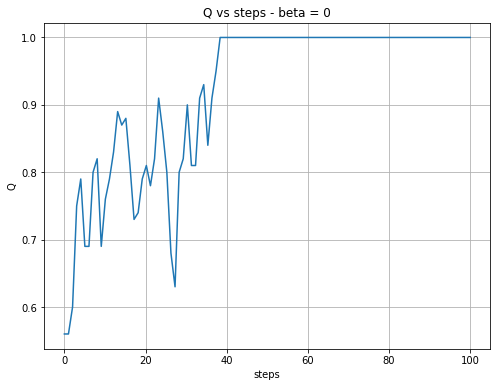

In [5]:
Time = 100
Q0=np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Q0[t],payoffi = play(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Q0)
plt.grid()

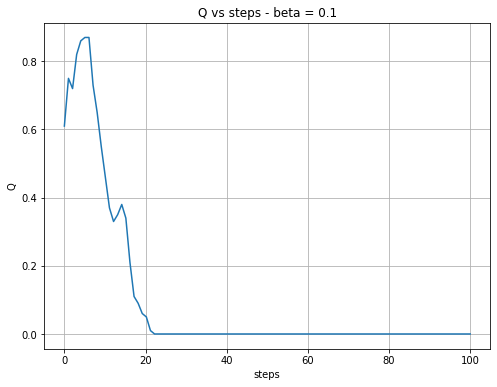

In [8]:
Q1=np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Q1[t],payoffi = play(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.1')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Q1)
plt.grid()

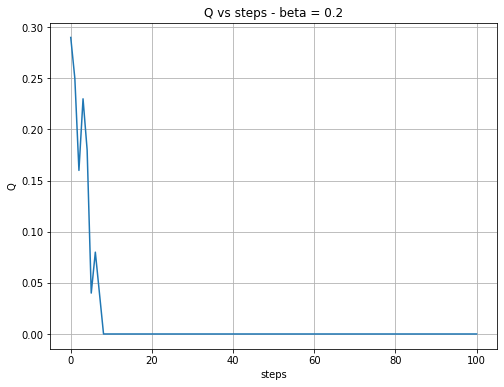

In [10]:
Q2 = np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Q2[t],payoffi = play(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.2')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Q2)
plt.grid()

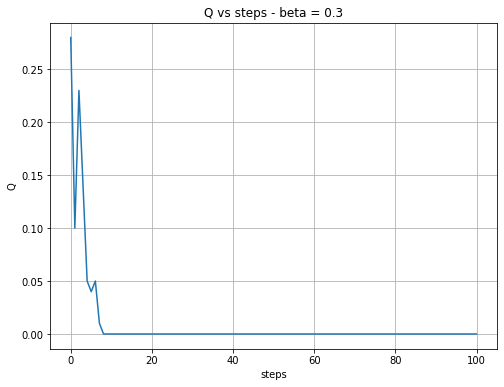

In [12]:
Q3 = np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Q3[t],payoffi = play(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.3')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Q3)
plt.grid()

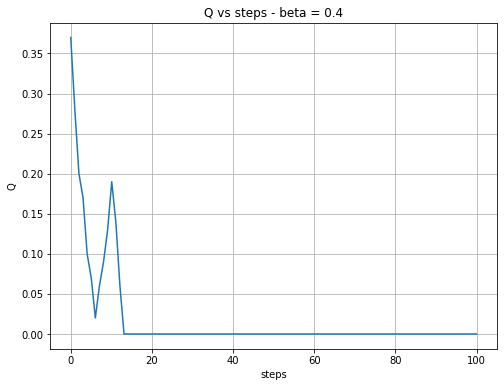

In [14]:
Q4 = np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Q4[t],payoffi = play(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.4')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Q4) 
plt.grid()

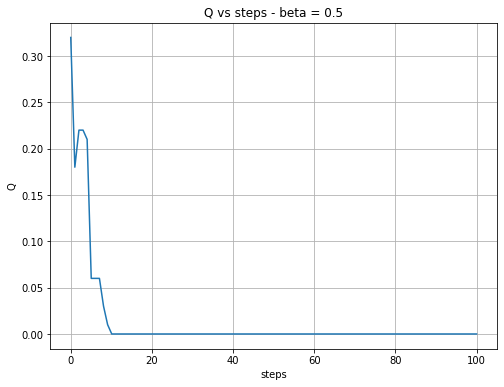

In [16]:
Q5 =np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Q5[t],payoffi = play(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.5')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Q5)
plt.grid()

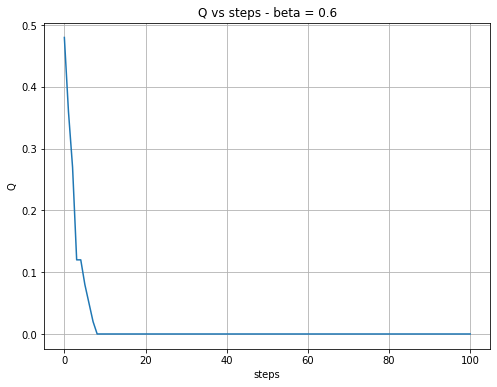

In [18]:
Q6 =np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Q6[t],payoffi = play(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.6')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Q6)
plt.grid()

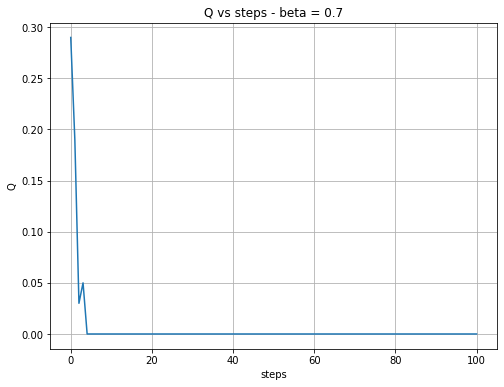

In [20]:
Q7 =np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Q7[t],payoffi = play(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.7')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Q7)
plt.grid()

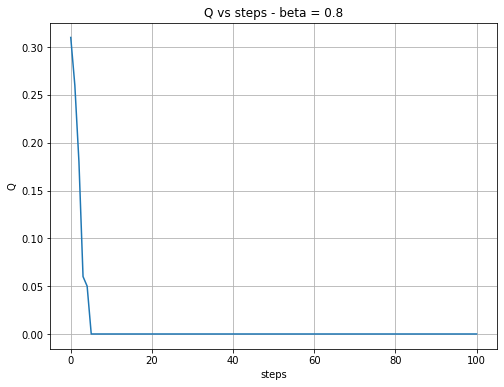

In [22]:
Q8 = np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Q8[t],payoffi = play(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.8')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Q8)
plt.grid()

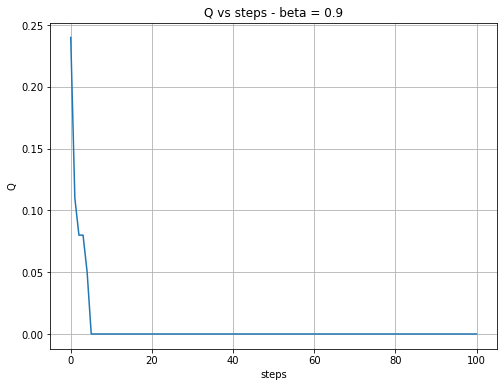

In [24]:
Q9 = np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Q9[t],payoffi = play(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.9')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Q9)
plt.grid()

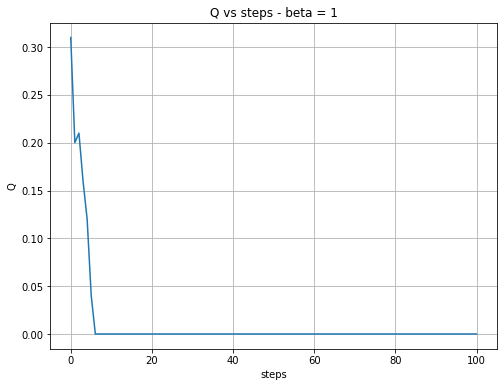

In [26]:
Q10 =np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Q10[t],payoffi = play(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 1')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Q10)
plt.grid()

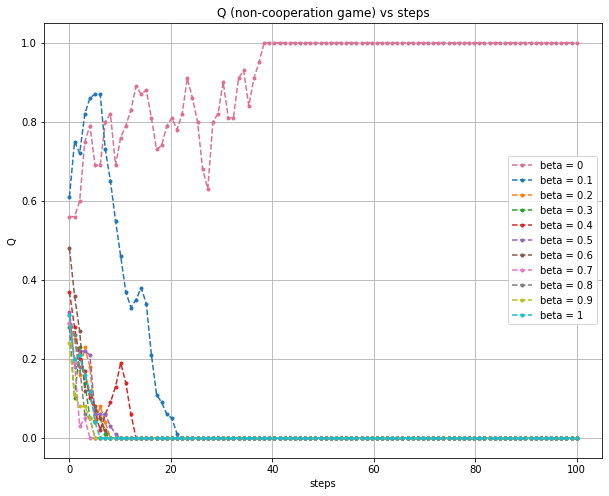

In [32]:
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(10,8))
plt.title('Q (non-cooperation game) vs steps')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Q0,'.-',linestyle='dashed',label='beta = 0',color = 'palevioletred')
plt.plot(time,Q1,'.-',linestyle='dashed',label='beta = 0.1') 
plt.plot(time,Q2,'.-',linestyle='dashed',label='beta = 0.2') 
plt.plot(time,Q3,'.-',linestyle='dashed',label='beta = 0.3') 
plt.plot(time,Q4,'.-',linestyle='dashed',label='beta = 0.4') 
plt.plot(time,Q5,'.-',linestyle='dashed',label='beta = 0.5') 
plt.plot(time,Q6,'.-',linestyle='dashed',label='beta = 0.6') 
plt.plot(time,Q7,'.-',linestyle='dashed',label='beta = 0.7') 
plt.plot(time,Q8,'.-',linestyle='dashed',label='beta = 0.8') 
plt.plot(time,Q9,'.-',linestyle='dashed',label='beta = 0.9') 
plt.plot(time,Q10,'.-',linestyle='dashed',label='beta = 1') 
plt.legend()
plt.grid()

In [31]:
Q0_equi = Q0[Time-1]
Q1_equi = Q1[Time-1]
Q2_equi = Q2[Time-1]
Q3_equi = Q3[Time-1]
Q4_equi = Q4[Time-1]
Q5_equi = Q5[Time-1]
Q6_equi = Q6[Time-1]
Q7_equi = Q7[Time-1]
Q8_equi = Q8[Time-1]
Q9_equi = Q9[Time-1]
Q10_equi = Q10[Time-1]
Q_equi=[Q0_equi,Q1_equi,Q2_equi,Q3_equi,Q4_equi,Q5_equi,Q6_equi,Q7_equi,Q8_equi,Q9_equi,Q10_equi]

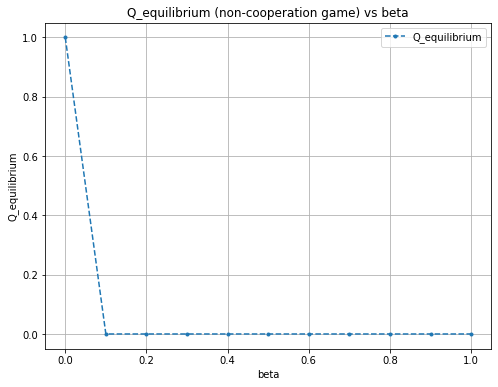

In [34]:
Beta = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
fig = plt.figure(figsize=(8,6))
plt.title('Q_equilibrium (non-cooperation game) vs beta')
plt.ylabel('Q_equilibrium')
plt.xlabel('beta')
plt.plot(Beta,Q_equi,'.-',linestyle='dashed',label='Q_equilibrium')
plt.legend()
plt.grid()

In [35]:
#part2 coopelation - nash equilibria
player1 = np.array([[2,0],[10,8]]) #first player
player2 = np.array([[2,10],[0,8]]) #second
game2 = nash.Game(player1,player2)
global N , L
N = 100
L = 10

In [69]:
def play(payoffi): #part 3 (with jumping) non-cooperation
    payoff = payoffi
    beta = 1
    s = np.zeros((L,L))
    P = 0.05
    for i in range(0,L):
        for j in range(0,L):
            if i == 0 and j != 0 and j != L-1:
                p1 = game[strategy[i][j][:],strategy[L-1][j][:]] #up
                payoff[i][j] = p1[0]
                payoff[L-1][j] = p1[1]
                p2 = game[strategy[i][j][:],strategy[i][j+1][:]]#right
                payoff[i][j] = p2[0]
                payoff[i][j+1] = p2[1]
                p3 = game[strategy[i][j][:],strategy[i+1][j][:]]#down
                payoff[i][j] = p3[0]
                payoff[i+1][j] = p3[1]
                p4 = game[strategy[i][j][:],strategy[i][j-1][:]]#left
                payoff[i][j] = p4[0]
                payoff[i][j-1] = p4[1]
                if j == 0:
                    p1 = game[strategy[i][j][:],strategy[L-1][j][:]] #up
                    payoff[i][j] = p1[0]
                    payoff[L-1][j] = p1[1]
                    p2 = game[strategy[i][j][:],strategy[i][j+1][:]]#right
                    payoff[i][j] = p2[0]
                    payoff[i][j+1] = p2[1]
                    p3 = game[strategy[i][j][:],strategy[i+1][j][:]]#down
                    payoff[i][j] = p3[0]
                    payoff[i+1][j] = p3[1]
                    p4 = game[strategy[i][j][:],strategy[i][L-1][:]]#left
                    payoff[i][j] = p4[0]
                    payoff[i][L-1] = p4[1]
                elif j == L-1:
                    p1 = game[strategy[i][j][:],strategy[L-1][j][:]] #up
                    payoff[i][j] = p1[0]
                    payoff[L-1][j] = p1[1]
                    p2 = game[strategy[i][j][:],strategy[i][0][:]]#right
                    payoff[i][j] = p2[0]
                    payoff[i][0] = p2[1]
                    p3 = game[strategy[i][j][:],strategy[i+1][j][:]]#down
                    payoff[i][j] = p3[0]
                    payoff[i+1][j] = p3[1]
                    p4 = game[strategy[i][j][:],strategy[i][j-1][:]]#left
                    payoff[i][j] = p4[0]
                    payoff[i][j-1] = p4[1]
                
            if i == L-1 and j != 0 and j != L-1:
                p1 = game[strategy[i][j][:],strategy[i-1][j][:]] #up
                payoff[i][j] = p1[0]
                payoff[i-1][j] = p1[1]
                p2 = game[strategy[i][j][:],strategy[i][j+1][:]]#right
                payoff[i][j] = p2[0]
                payoff[i][j+1] = p2[1]
                p3 = game[strategy[i][j][:],strategy[0][j][:]]#down
                payoff[i][j] = p3[0]
                payoff[0][j] = p3[1]
                p4 = game[strategy[i][j][:],strategy[i][j-1][:]]#left
                payoff[i][j] = p4[0]
                payoff[i][j-1] = p4[1]
                if j == 0:
                    p1 = game[strategy[i][j][:],strategy[i-1][j][:]] #up
                    payoff[i][j] = p1[0]
                    payoff[i-1][j] = p1[1]
                    p2 = game[strategy[i][j][:],strategy[i][j+1][:]]#right
                    payoff[i][j] = p2[0]
                    payoff[i][j+1] = p2[1]
                    p3 = game[strategy[i][j][:],strategy[0][j][:]]#down
                    payoff[i][j] = p3[0]
                    payoff[0][j] = p3[1]
                    p4 = game[strategy[i][j][:],strategy[i][L-1][:]]#left
                    payoff[i][j] = p4[0]
                    payoff[i][L-1] = p4[1]
                elif j == L-1:
                    p1 = game[strategy[i][j][:],strategy[i-1][j][:]] #up
                    payoff[i][j] = p1[0]
                    payoff[i-1][j] = p1[1]
                    p2 = game[strategy[i][j][:],strategy[i][0][:]]#right
                    payoff[i][j] = p2[0]
                    payoff[i][0] = p2[1]
                    p3 = game[strategy[i][j][:],strategy[0][j][:]]#down
                    payoff[i][j] = p3[0]
                    payoff[0][j] = p3[1]
                    p4 = game[strategy[i][j][:],strategy[i][j-1][:]]#left
                    payoff[i][j] = p4[0]
                    payoff[i][j-1] = p4[1]
            if i != L-1 and i != 0 and j != 0 and j != L-1:
                p1 = game[strategy[i][j][:],strategy[i-1][j][:]] #up
                payoff[i][j] = p1[0]
                payoff[i-1][j] = p1[1]
                p2 = game[strategy[i][j][:],strategy[i][j+1][:]]#right
                payoff[i][j] = p2[0]
                payoff[i][j+1] = p2[1]
                p3 = game[strategy[i][j][:],strategy[i+1][j][:]]#down
                payoff[i][j] = p3[0]
                payoff[i+1][j] = p3[1]
                p4 = game[strategy[i][j][:],strategy[i][j-1][:]]#left
                payoff[i][j] = p4[0]
                payoff[i][j-1] = p4[1]
                
    b = np.random.rand()
    if b>P:
        for i in range(0,L):
            for j in range(0,L):
                a = np.random.rand() 
                compare_i = random.randint(0, 9)
                compare_j = random.randint(0, 9)
                delta_payoff = payoff[i][j] - payoff[compare_i][compare_j]
                p = np.exp(-(beta*delta_payoff))
                if payoff[compare_i][compare_j] >= payoff[i][j]:
                    strategy[i][j][:] = strategy[compare_i][compare_j][:]
                elif a<p:
                    strategy[i][j][:] = strategy[compare_i][compare_j][:]
    else:
        sigma0 = strategy[i][j][0]
        sigma1 = strategy[i][j][1]
        strategy[i][j][1] = sigma0
        strategy[i][j][0] = sigma1
    for i in range(0,L):
        for j in range(0,L):
            if strategy[i][j][1] == 1:
                s[i][j]+=1
                
    return((np.sum(s))/N,payoff)

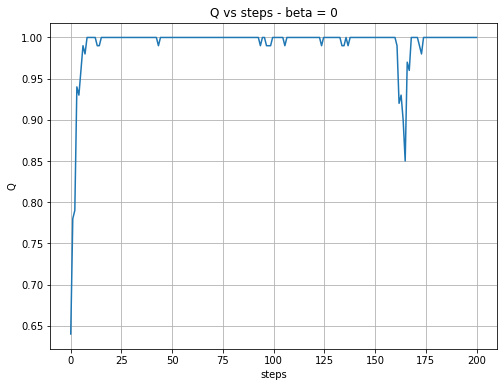

In [41]:
Time = 200
Qp0=np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Qp0[t],payoffi = play(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Qp0)
plt.grid()

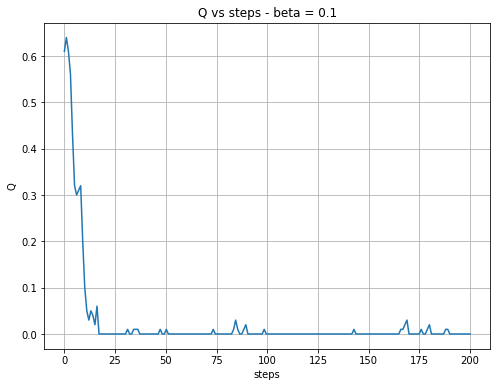

In [44]:
Qp1=np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Qp1[t],payoffi = play(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.1')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Qp1)
plt.grid()

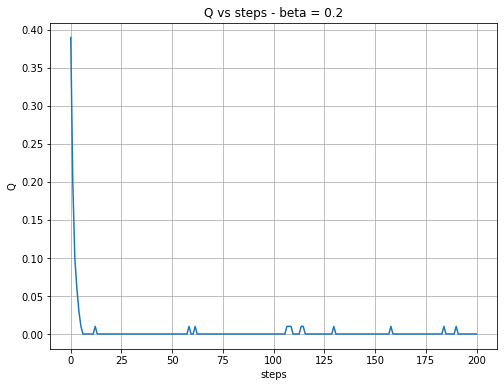

In [47]:
Qp2 = np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Qp2[t],payoffi = play(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.2')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Qp2) 
plt.grid()

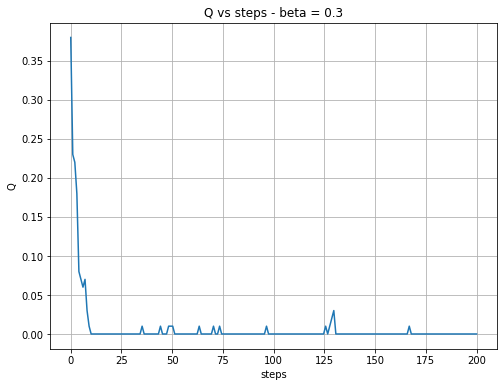

In [51]:
Qp3 = np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Qp3[t],payoffi = play(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.3')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Qp3)
plt.grid()

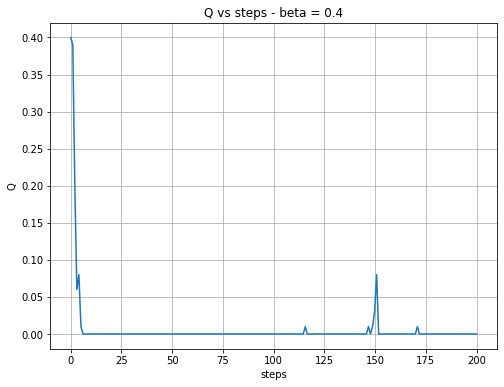

In [53]:
Qp4 = np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Qp4[t],payoffi = play(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.4')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Qp4) 
plt.grid()

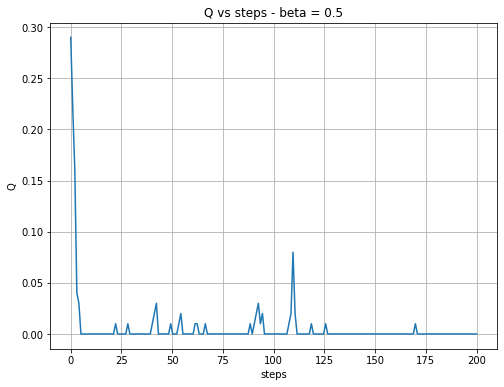

In [56]:
Qp5 =np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Qp5[t],payoffi = play(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.5')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Qp5)
plt.grid()

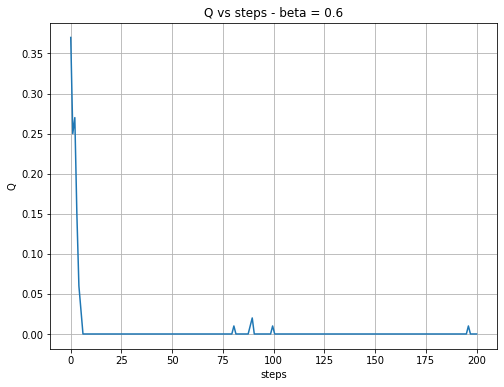

In [58]:
Qp6 =np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Qp6[t],payoffi = play(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.6')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Qp6)
plt.grid()

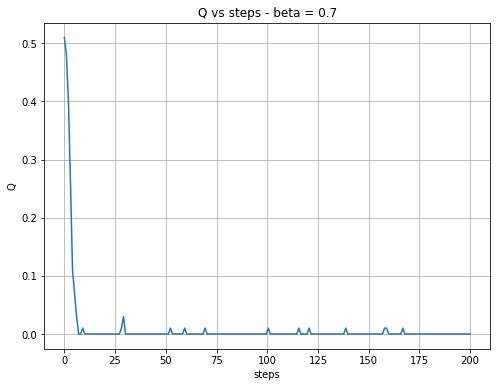

In [61]:
Qp7 =np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Qp7[t],payoffi = play(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.7')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Qp7)
plt.grid()

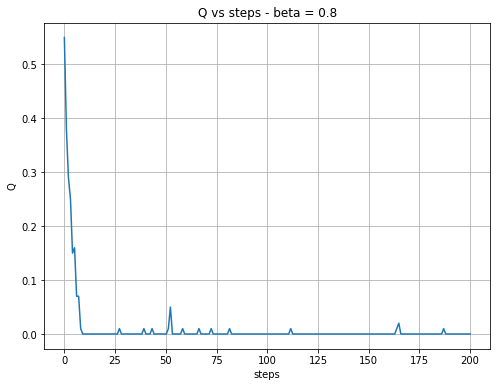

In [63]:
Qp8 = np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Qp8[t],payoffi = play(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.8')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Qp8)
plt.grid()

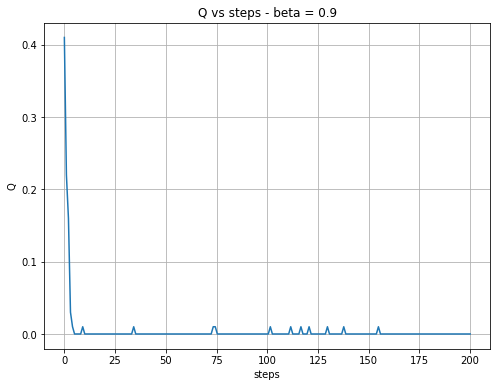

In [67]:
Qp9 = np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Qp9[t],payoffi = play(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.9')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Qp9)
plt.grid()

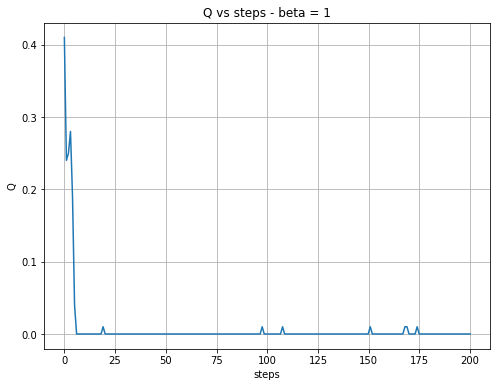

In [70]:
Qp10 =np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Qp10[t],payoffi = play(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 1')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Qp10)
plt.grid()

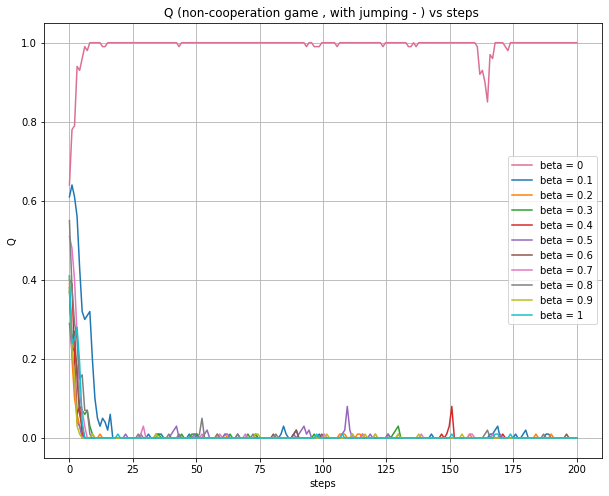

In [76]:
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(10,8))
plt.title('Q (non-cooperation game , with jumping - ) vs steps ')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Qp0,label='beta = 0',color = 'palevioletred')
plt.plot(time,Qp1,label='beta = 0.1') 
plt.plot(time,Qp2,label='beta = 0.2') 
plt.plot(time,Qp3,label='beta = 0.3') 
plt.plot(time,Qp4,label='beta = 0.4') 
plt.plot(time,Qp5,label='beta = 0.5') 
plt.plot(time,Qp6,label='beta = 0.6') 
plt.plot(time,Qp7,label='beta = 0.7') 
plt.plot(time,Qp8,label='beta = 0.8') 
plt.plot(time,Qp9,label='beta = 0.9') 
plt.plot(time,Qp10,label='beta = 1') 
plt.legend()
plt.grid()

In [77]:
Qp0_equi = Qp0[Time-1]
Qp1_equi = Qp1[Time-1]
Qp2_equi = Qp2[Time-1]
Qp3_equi = Qp3[Time-1]
Qp4_equi = Qp4[Time-1]
Qp5_equi = Qp5[Time-1]
Qp6_equi = Qp6[Time-1]
Qp7_equi = Qp7[Time-1]
Qp8_equi = Qp8[Time-1]
Qp9_equi = Qp9[Time-1]
Qp10_equi = Qp10[Time-1]
Qp_equi=[Qp0_equi,Qp1_equi,Qp2_equi,Qp3_equi,Qp4_equi,Qp5_equi,Qp6_equi,Qp7_equi,Qp8_equi,Qp9_equi,Qp10_equi]

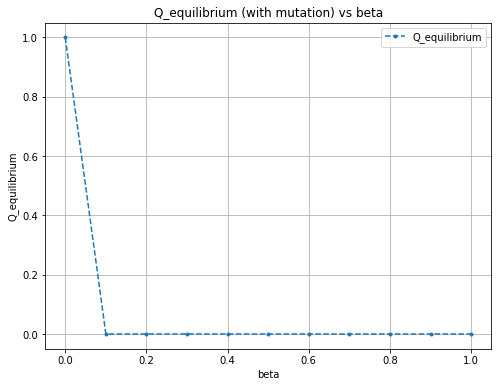

In [220]:
Beta = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
fig = plt.figure(figsize=(8,6))
plt.title('Q_equilibrium (with mutation) vs beta')
plt.ylabel('Q_equilibrium')
plt.xlabel('beta')
plt.plot(Beta,Qp_equi,'.-',linestyle='dashed',label='Q_equilibrium')
plt.legend()
plt.grid()

In [112]:
def play2(payoffi): #part 3
    payoff = payoffi
    beta = 1
    s = np.zeros((L,L))
    P = 0.05
    for i in range(0,L):
        for j in range(0,L):
            if i == 0 and j != 0 and j != L-1:
                p1 = game2[strategy[i][j][:],strategy[L-1][j][:]] #up
                payoff[i][j] = p1[0]
                payoff[L-1][j] = p1[1]
                p2 = game2[strategy[i][j][:],strategy[i][j+1][:]]#right
                payoff[i][j] = p2[0]
                payoff[i][j+1] = p2[1]
                p3 = game2[strategy[i][j][:],strategy[i+1][j][:]]#down
                payoff[i][j] = p3[0]
                payoff[i+1][j] = p3[1]
                p4 = game2[strategy[i][j][:],strategy[i][j-1][:]]#left
                payoff[i][j] = p4[0]
                payoff[i][j-1] = p4[1]
                if j == 0:
                    p1 = game2[strategy[i][j][:],strategy[L-1][j][:]] #up
                    payoff[i][j] = p1[0]
                    payoff[L-1][j] = p1[1]
                    p2 = game2[strategy[i][j][:],strategy[i][j+1][:]]#right
                    payoff[i][j] = p2[0]
                    payoff[i][j+1] = p2[1]
                    p3 = game2[strategy[i][j][:],strategy[i+1][j][:]]#down
                    payoff[i][j] = p3[0]
                    payoff[i+1][j] = p3[1]
                    p4 = game2[strategy[i][j][:],strategy[i][L-1][:]]#left
                    payoff[i][j] = p4[0]
                    payoff[i][L-1] = p4[1]
                elif j == L-1:
                    p1 = game2[strategy[i][j][:],strategy[L-1][j][:]] #up
                    payoff[i][j] = p1[0]
                    payoff[L-1][j] = p1[1]
                    p2 = game2[strategy[i][j][:],strategy[i][0][:]]#right
                    payoff[i][j] = p2[0]
                    payoff[i][0] = p2[1]
                    p3 = game2[strategy[i][j][:],strategy[i+1][j][:]]#down
                    payoff[i][j] = p3[0]
                    payoff[i+1][j] = p3[1]
                    p4 = game2[strategy[i][j][:],strategy[i][j-1][:]]#left
                    payoff[i][j] = p4[0]
                    payoff[i][j-1] = p4[1]
                
            if i == L-1 and j != 0 and j != L-1:
                p1 = game2[strategy[i][j][:],strategy[i-1][j][:]] #up
                payoff[i][j] = p1[0]
                payoff[i-1][j] = p1[1]
                p2 = game2[strategy[i][j][:],strategy[i][j+1][:]]#right
                payoff[i][j] = p2[0]
                payoff[i][j+1] = p2[1]
                p3 = game2[strategy[i][j][:],strategy[0][j][:]]#down
                payoff[i][j] = p3[0]
                payoff[0][j] = p3[1]
                p4 = game2[strategy[i][j][:],strategy[i][j-1][:]]#left
                payoff[i][j] = p4[0]
                payoff[i][j-1] = p4[1]
                if j == 0:
                    p1 = game2[strategy[i][j][:],strategy[i-1][j][:]] #up
                    payoff[i][j] = p1[0]
                    payoff[i-1][j] = p1[1]
                    p2 = game2[strategy[i][j][:],strategy[i][j+1][:]]#right
                    payoff[i][j] = p2[0]
                    payoff[i][j+1] = p2[1]
                    p3 = game2[strategy[i][j][:],strategy[0][j][:]]#down
                    payoff[i][j] = p3[0]
                    payoff[0][j] = p3[1]
                    p4 = game2[strategy[i][j][:],strategy[i][L-1][:]]#left
                    payoff[i][j] = p4[0]
                    payoff[i][L-1] = p4[1]
                elif j == L-1:
                    p1 = game2[strategy[i][j][:],strategy[i-1][j][:]] #up
                    payoff[i][j] = p1[0]
                    payoff[i-1][j] = p1[1]
                    p2 = game2[strategy[i][j][:],strategy[i][0][:]]#right
                    payoff[i][j] = p2[0]
                    payoff[i][0] = p2[1]
                    p3 = game2[strategy[i][j][:],strategy[0][j][:]]#down
                    payoff[i][j] = p3[0]
                    payoff[0][j] = p3[1]
                    p4 = game2[strategy[i][j][:],strategy[i][j-1][:]]#left
                    payoff[i][j] = p4[0]
                    payoff[i][j-1] = p4[1]
            if i != L-1 and i != 0 and j != 0 and j != L-1:
                p1 = game2[strategy[i][j][:],strategy[i-1][j][:]] #up
                payoff[i][j] = p1[0]
                payoff[i-1][j] = p1[1]
                p2 = game2[strategy[i][j][:],strategy[i][j+1][:]]#right
                payoff[i][j] = p2[0]
                payoff[i][j+1] = p2[1]
                p3 = game2[strategy[i][j][:],strategy[i+1][j][:]]#down
                payoff[i][j] = p3[0]
                payoff[i+1][j] = p3[1]
                p4 = game2[strategy[i][j][:],strategy[i][j-1][:]]#left
                payoff[i][j] = p4[0]
                payoff[i][j-1] = p4[1]
                
    b = np.random.rand()
    if b>P:
        for i in range(0,L):
            for j in range(0,L):
                a = np.random.rand() 
                compare_i = random.randint(0, 9)
                compare_j = random.randint(0, 9)
                delta_payoff = payoff[i][j] - payoff[compare_i][compare_j]
                p = np.exp(-(beta*delta_payoff))
                if payoff[compare_i][compare_j] >= payoff[i][j]:
                    strategy[i][j][:] = strategy[compare_i][compare_j][:]
                elif a<p:
                    strategy[i][j][:] = strategy[compare_i][compare_j][:]
    else:
        sigma0 = strategy[i][j][0]
        sigma1 = strategy[i][j][1]
        strategy[i][j][1] = sigma0
        strategy[i][j][0] = sigma1
    for i in range(0,L):
        for j in range(0,L):
            if strategy[i][j][1] == 1:
                s[i][j]+=1
                
    return((np.sum(s))/N,payoff)

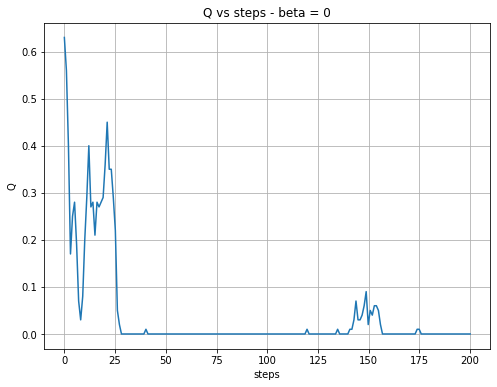

In [89]:
Time = 200
Q2p0=np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Q2p0[t],payoffi = play2(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Q2p0)
plt.grid()

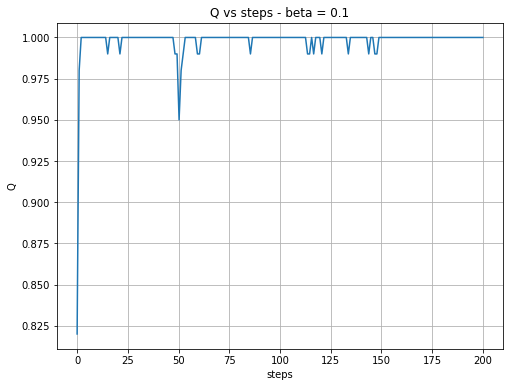

In [91]:
Q2p1=np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Q2p1[t],payoffi = play2(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.1')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Q2p1)
plt.grid()

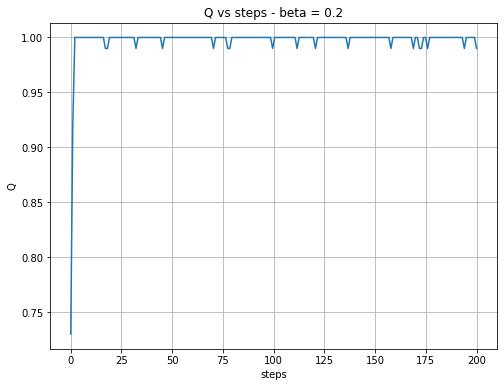

In [94]:
Q2p2 = np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Q2p2[t],payoffi = play2(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.2')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Q2p2)
plt.grid()

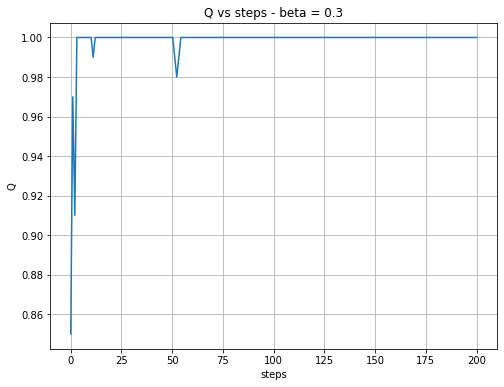

In [97]:
Q2p3 = np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Q2p3[t],payoffi = play2(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.3')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Q2p3)
plt.grid()

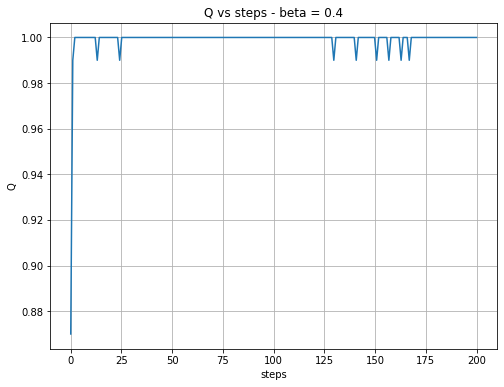

In [101]:
Q2p4 = np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Q2p4[t],payoffi = play2(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.4')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Q2p4)
plt.grid()

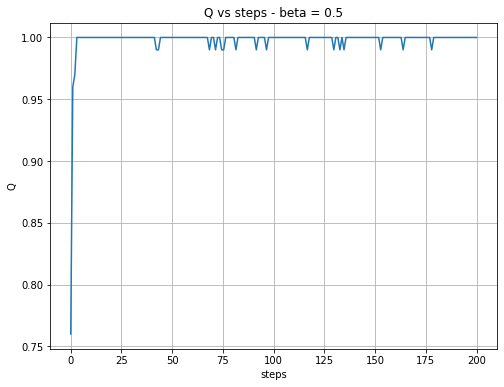

In [103]:
Q2p5 =np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Q2p5[t],payoffi = play2(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.5')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Q2p5)
plt.grid()

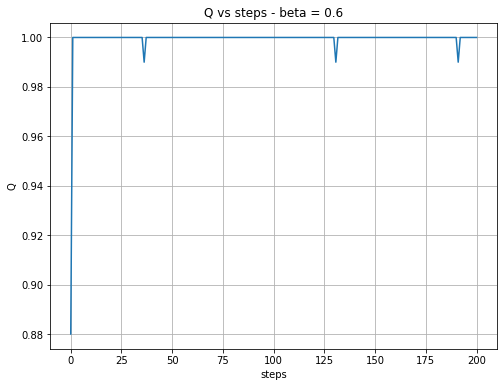

In [105]:
Q2p6 =np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Q2p6[t],payoffi = play2(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.6')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Q2p6)
plt.grid()

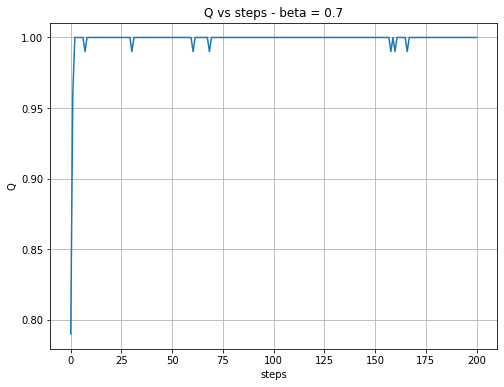

In [107]:
Q2p7 =np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Q2p7[t],payoffi = play2(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.7')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Q2p7)
plt.grid()

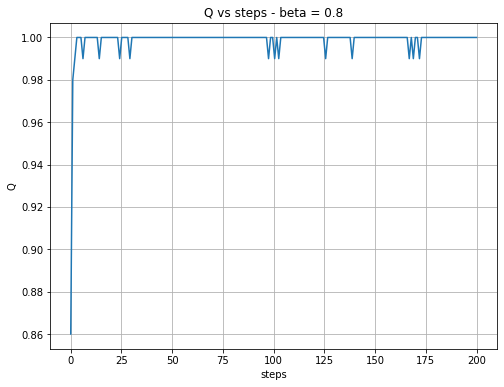

In [109]:
Q2p8 = np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Q2p8[t],payoffi = play2(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.8')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Q2p8)
plt.grid()

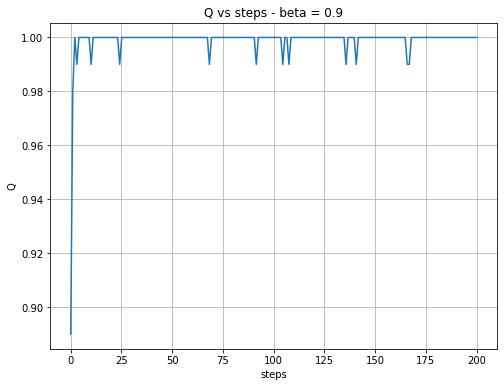

In [111]:
Q2p9 = np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Q2p9[t],payoffi = play2(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 0.9')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Q2p9)
plt.grid()

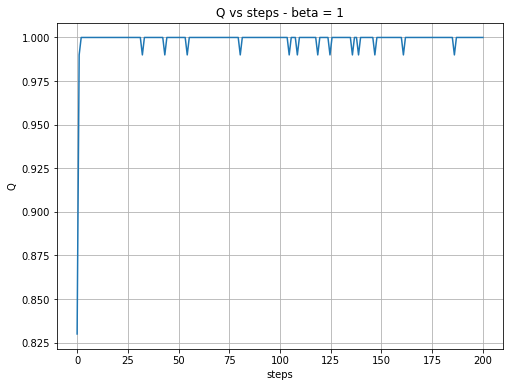

In [113]:
Q2p10 =np.zeros(Time)
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
for t in range(Time):
    Q2p10[t],payoffi = play2(payoffi)
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q vs steps - beta = 1')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Q2p10)
plt.grid()

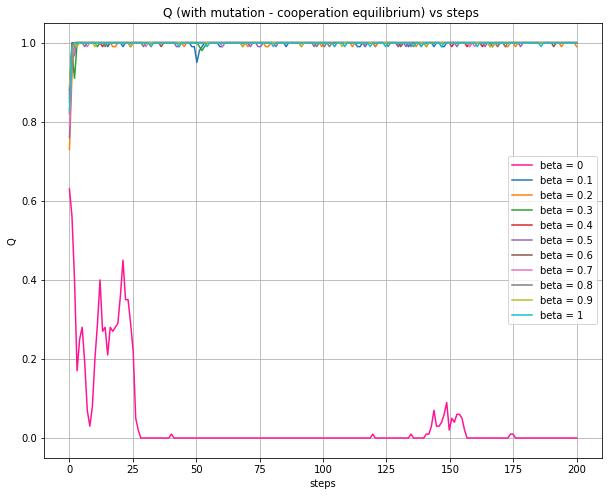

In [115]:
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(10,8))
plt.title('Q (with mutation - cooperation equilibrium) vs steps ')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Q2p0,label='beta = 0',color = 'deeppink')
plt.plot(time,Q2p1,label='beta = 0.1') 
plt.plot(time,Q2p2,label='beta = 0.2') 
plt.plot(time,Q2p3,label='beta = 0.3') 
plt.plot(time,Q2p4,label='beta = 0.4') 
plt.plot(time,Q2p5,label='beta = 0.5') 
plt.plot(time,Q2p6,label='beta = 0.6') 
plt.plot(time,Q2p7,label='beta = 0.7') 
plt.plot(time,Q2p8,label='beta = 0.8') 
plt.plot(time,Q2p9,label='beta = 0.9') 
plt.plot(time,Q2p10,label='beta = 1') 
plt.legend()
plt.grid()

In [116]:
Q2p0_equi = Q2p0[Time-1]
Q2p1_equi = Q2p1[Time-1]
Q2p2_equi = Q2p2[Time-1]
Q2p3_equi = Q2p3[Time-1]
Q2p4_equi = Q2p4[Time-1]
Q2p5_equi = Q2p5[Time-1]
Q2p6_equi = Q2p6[Time-1]
Q2p7_equi = Q2p7[Time-1]
Q2p8_equi = Q2p8[Time-1]
Q2p9_equi = Q2p9[Time-1]
Q2p10_equi = Q2p10[Time-1]
Q2p_equi=[Q2p0_equi,Q2p1_equi,Q2p2_equi,Q2p3_equi,Q2p4_equi,Q2p5_equi,Q2p6_equi,Q2p7_equi,Q2p8_equi,Q2p9_equi,Q2p10_equi]

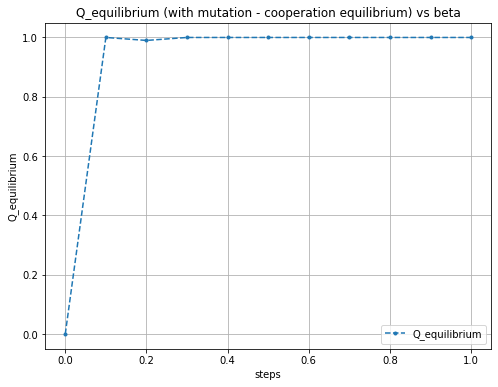

In [117]:
Beta = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
fig = plt.figure(figsize=(8,6))
plt.title('Q_equilibrium (with mutation - cooperation equilibrium) vs beta')
plt.ylabel('Q_equilibrium')
plt.xlabel('steps')
plt.plot(Beta,Q2p_equi,'.-',linestyle='dashed',label='Q_equilibrium')
plt.legend()
plt.grid()

In [118]:
#part4 - non-coopelation - punhish game
player1=np.array([[0,0],[0,0]])#first player
player2 = np.array([[2,0],[10,8]]) #second
punish_game = nash.Game(player1,player2)
global N , L
N = 100
L = 10

In [120]:
def check_strategy(strategy):
    if strategy[0] == 1:
        return(1)
    else:
        return(0)

In [221]:
def play3(payoffi,R): #part 3
    payoff = payoffi
    beta = 0.3
    r = R
    s = np.zeros((L,L))
    P = 0.05
    for i in range(0,L):
        for j in range(0,L):
            if check_strategy(strategy[i][j][:]) == 1:#strategy :non cooperation
                c = np.random.rand() 
                if c<=r:
                    payoff[i][j] = 0
                    if i == 0 and j != 0 and j != L-1:
                        p1 = punish_game[strategy[i][j][:],strategy[L-1][j][:]] #up
                        payoff[i][j] = p1[0]
                        payoff[L-1][j] = p1[1]
                        p2 = punish_game[strategy[i][j][:],strategy[i][j+1][:]]#right
                        payoff[i][j] = p2[0]
                        payoff[i][j+1] = p2[1]
                        p3 = punish_game[strategy[i][j][:],strategy[i+1][j][:]]#down
                        payoff[i][j] = p3[0]
                        payoff[i+1][j] = p3[1]
                        p4 = punish_game[strategy[i][j][:],strategy[i][j-1][:]]#left
                        payoff[i][j] = p4[0]
                        payoff[i][j-1] = p4[1]
                        if j == 0:
                            p1 = punish_game[strategy[i][j][:],strategy[L-1][j][:]] #up
                            payoff[i][j] = p1[0]
                            payoff[L-1][j] = p1[1]
                            p2 = punish_game[strategy[i][j][:],strategy[i][j+1][:]]#right
                            payoff[i][j] = p2[0]
                            payoff[i][j+1] = p2[1]
                            p3 = punish_game[strategy[i][j][:],strategy[i+1][j][:]]#down
                            payoff[i][j] = p3[0]
                            payoff[i+1][j] = p3[1]
                            p4 = punish_game[strategy[i][j][:],strategy[i][L-1][:]]#left
                            payoff[i][j] = p4[0]
                            payoff[i][L-1] = p4[1]
                        elif j == L-1:
                            p1 = punish_game[strategy[i][j][:],strategy[L-1][j][:]] #up
                            payoff[i][j] = p1[0]
                            payoff[L-1][j] = p1[1]
                            p2 = punish_game[strategy[i][j][:],strategy[i][0][:]]#right
                            payoff[i][j] = p2[0]
                            payoff[i][0] = p2[1]
                            p3 = punish_game[strategy[i][j][:],strategy[i+1][j][:]]#down
                            payoff[i][j] = p3[0]
                            payoff[i+1][j] = p3[1]
                            p4 = punish_game[strategy[i][j][:],strategy[i][j-1][:]]#left
                            payoff[i][j] = p4[0]
                            payoff[i][j-1] = p4[1]
                    if i == L-1 and j != 0 and j != L-1:
                        p1 = punish_game[strategy[i][j][:],strategy[i-1][j][:]] #up
                        payoff[i][j] = p1[0]
                        payoff[i-1][j] = p1[1]
                        p2 = punish_game[strategy[i][j][:],strategy[i][j+1][:]]#right
                        payoff[i][j] = p2[0]
                        payoff[i][j+1] = p2[1]
                        p3 = punish_game[strategy[i][j][:],strategy[0][j][:]]#down
                        payoff[i][j] = p3[0]
                        payoff[0][j] = p3[1]
                        p4 = punish_game[strategy[i][j][:],strategy[i][j-1][:]]#left
                        payoff[i][j] = p4[0]
                        payoff[i][j-1] = p4[1]
                        if j == 0:
                            p1 = punish_game[strategy[i][j][:],strategy[i-1][j][:]] #up
                            payoff[i][j] = p1[0]
                            payoff[i-1][j] = p1[1]
                            p2 = punish_game[strategy[i][j][:],strategy[i][j+1][:]]#right
                            payoff[i][j] = p2[0]
                            payoff[i][j+1] = p2[1]
                            p3 = punish_game[strategy[i][j][:],strategy[0][j][:]]#down
                            payoff[i][j] = p3[0]
                            payoff[0][j] = p3[1]
                            p4 = punish_game[strategy[i][j][:],strategy[i][L-1][:]]#left
                            payoff[i][j] = p4[0]
                            payoff[i][L-1] = p4[1]
                        elif j == L-1:
                            p1 = punish_game[strategy[i][j][:],strategy[i-1][j][:]] #up
                            payoff[i][j] = p1[0]
                            payoff[i-1][j] = p1[1]
                            p2 = punish_game[strategy[i][j][:],strategy[i][0][:]]#right
                            payoff[i][j] = p2[0]
                            payoff[i][0] = p2[1]
                            p3 = punish_game[strategy[i][j][:],strategy[0][j][:]]#down
                            payoff[i][j] = p3[0]
                            payoff[0][j] = p3[1]
                            p4 = punish_game[strategy[i][j][:],strategy[i][j-1][:]]#left
                            payoff[i][j] = p4[0]
                            payoff[i][j-1] = p4[1]
            
                    if i != L-1 and i != 0 and j != 0 and j != L-1:
                            p1 = punish_game[strategy[i][j][:],strategy[i-1][j][:]] #up
                            payoff[i][j] = p1[0]
                            payoff[i-1][j] = p1[1]
                            p2 = punish_game[strategy[i][j][:],strategy[i][j+1][:]]#right
                            payoff[i][j] = p2[0]
                            payoff[i][j+1] = p2[1]
                            p3 = punish_game[strategy[i][j][:],strategy[i+1][j][:]]#down
                            payoff[i][j] = p3[0]
                            payoff[i+1][j] = p3[1]
                            p4 = punish_game[strategy[i][j][:],strategy[i][j-1][:]]#left
                            payoff[i][j] = p4[0]
                            payoff[i][j-1] = p4[1]
                else:
                    if i == 0 and j != 0 and j != L-1:
                        p1 = game[strategy[i][j][:],strategy[L-1][j][:]] #up
                        payoff[i][j] = p1[0]
                        payoff[L-1][j] = p1[1]
                        p2 = game[strategy[i][j][:],strategy[i][j+1][:]]#right
                        payoff[i][j] = p2[0]
                        payoff[i][j+1] = p2[1]
                        p3 = game[strategy[i][j][:],strategy[i+1][j][:]]#down
                        payoff[i][j] = p3[0]
                        payoff[i+1][j] = p3[1]
                        p4 = game[strategy[i][j][:],strategy[i][j-1][:]]#left
                        payoff[i][j] = p4[0]
                        payoff[i][j-1] = p4[1]
                        if j == 0:
                            p1 = game[strategy[i][j][:],strategy[L-1][j][:]] #up
                            payoff[i][j] = p1[0]
                            payoff[L-1][j] = p1[1]
                            p2 = game[strategy[i][j][:],strategy[i][j+1][:]]#right
                            payoff[i][j] = p2[0]
                            payoff[i][j+1] = p2[1]
                            p3 = game[strategy[i][j][:],strategy[i+1][j][:]]#down
                            payoff[i][j] = p3[0]
                            payoff[i+1][j] = p3[1]
                            p4 = game[strategy[i][j][:],strategy[i][L-1][:]]#left
                            payoff[i][j] = p4[0]
                            payoff[i][L-1] = p4[1]
                        elif j == L-1:
                            p1 = game[strategy[i][j][:],strategy[L-1][j][:]] #up
                            payoff[i][j] = p1[0]
                            payoff[L-1][j] = p1[1]
                            p2 = game[strategy[i][j][:],strategy[i][0][:]]#right
                            payoff[i][j] = p2[0]
                            payoff[i][0] = p2[1]
                            p3 = game[strategy[i][j][:],strategy[i+1][j][:]]#down
                            payoff[i][j] = p3[0]
                            payoff[i+1][j] = p3[1]
                            p4 = game[strategy[i][j][:],strategy[i][j-1][:]]#left
                            payoff[i][j] = p4[0]
                            payoff[i][j-1] = p4[1]
                    if i == L-1 and j != 0 and j != L-1:
                        p1 = game[strategy[i][j][:],strategy[i-1][j][:]] #up
                        payoff[i][j] = p1[0]
                        payoff[i-1][j] = p1[1]
                        p2 = game[strategy[i][j][:],strategy[i][j+1][:]]#right
                        payoff[i][j] = p2[0]
                        payoff[i][j+1] = p2[1]
                        p3 = game[strategy[i][j][:],strategy[0][j][:]]#down
                        payoff[i][j] = p3[0]
                        payoff[0][j] = p3[1]
                        p4 = game[strategy[i][j][:],strategy[i][j-1][:]]#left
                        payoff[i][j] = p4[0]
                        payoff[i][j-1] = p4[1]
                        if j == 0:
                            p1 = game[strategy[i][j][:],strategy[i-1][j][:]] #up
                            payoff[i][j] = p1[0]
                            payoff[i-1][j] = p1[1]
                            p2 = game[strategy[i][j][:],strategy[i][j+1][:]]#right
                            payoff[i][j] = p2[0]
                            payoff[i][j+1] = p2[1]
                            p3 = game[strategy[i][j][:],strategy[0][j][:]]#down
                            payoff[i][j] = p3[0]
                            payoff[0][j] = p3[1]
                            p4 = game[strategy[i][j][:],strategy[i][L-1][:]]#left
                            payoff[i][j] = p4[0]
                            payoff[i][L-1] = p4[1]
                        elif j == L-1:
                            p1 = game[strategy[i][j][:],strategy[i-1][j][:]] #up
                            payoff[i][j] = p1[0]
                            payoff[i-1][j] = p1[1]
                            p2 = game[strategy[i][j][:],strategy[i][0][:]]#right
                            payoff[i][j] = p2[0]
                            payoff[i][0] = p2[1]
                            p3 = game[strategy[i][j][:],strategy[0][j][:]]#down
                            payoff[i][j] = p3[0]
                            payoff[0][j] = p3[1]
                            p4 = game[strategy[i][j][:],strategy[i][j-1][:]]#left
                            payoff[i][j] = p4[0]
                            payoff[i][j-1] = p4[1]
                    if i != L-1 and i != 0 and j != 0 and j != L-1:
                        p1 = game[strategy[i][j][:],strategy[i-1][j][:]] #up
                        payoff[i][j] = p1[0]
                        payoff[i-1][j] = p1[1]
                        p2 = game[strategy[i][j][:],strategy[i][j+1][:]]#right
                        payoff[i][j] = p2[0]
                        payoff[i][j+1] = p2[1]
                        p3 = game[strategy[i][j][:],strategy[i+1][j][:]]#down
                        payoff[i][j] = p3[0]
                        payoff[i+1][j] = p3[1]
                        p4 = game[strategy[i][j][:],strategy[i][j-1][:]]#left
                        payoff[i][j] = p4[0]
                        payoff[i][j-1] = p4[1]

    for i in range(0,L):
        for j in range(0,L):
            a = np.random.rand() 
            compare_i = random.randint(0, 9)
            compare_j = random.randint(0, 9)
            delta_payoff = payoff[i][j] - payoff[compare_i][compare_j]
            p = np.exp(-(beta*delta_payoff))
            if payoff[compare_i][compare_j] >= payoff[i][j]:
                strategy[i][j][:] = strategy[compare_i][compare_j][:]
            elif a<p:
                strategy[i][j][:] = strategy[compare_i][compare_j][:]
    for i in range(0,L):
        for j in range(0,L):
            if check_strategy(strategy[i][j][:]) == 0:#strategy :non cooperation
                d = np.random.rand() 
                if d<=(1-r):
                    if i == 0 and j != 0 and j != L-1:
                        p1 = game[strategy[i][j][:],strategy[L-1][j][:]] #up
                        payoff[i][j] = p1[0]
                        payoff[L-1][j] = p1[1]
                        p2 = game[strategy[i][j][:],strategy[i][j+1][:]]#right
                        payoff[i][j] = p2[0]
                        payoff[i][j+1] = p2[1]
                        p3 = game[strategy[i][j][:],strategy[i+1][j][:]]#down
                        payoff[i][j] = p3[0]
                        payoff[i+1][j] = p3[1]
                        p4 = game[strategy[i][j][:],strategy[i][j-1][:]]#left
                        payoff[i][j] = p4[0]
                        payoff[i][j-1] = p4[1]
                        if j == 0:
                            p1 = game[strategy[i][j][:],strategy[L-1][j][:]] #up
                            payoff[i][j] = p1[0]
                            payoff[L-1][j] = p1[1]
                            p2 = game[strategy[i][j][:],strategy[i][j+1][:]]#right
                            payoff[i][j] = p2[0]
                            payoff[i][j+1] = p2[1]
                            p3 = game[strategy[i][j][:],strategy[i+1][j][:]]#down
                            payoff[i][j] = p3[0]
                            payoff[i+1][j] = p3[1]
                            p4 = game[strategy[i][j][:],strategy[i][L-1][:]]#left
                            payoff[i][j] = p4[0]
                            payoff[i][L-1] = p4[1]
                        elif j == L-1:
                            p1 = game[strategy[i][j][:],strategy[L-1][j][:]] #up
                            payoff[i][j] = p1[0]
                            payoff[L-1][j] = p1[1]
                            p2 = game[strategy[i][j][:],strategy[i][0][:]]#right
                            payoff[i][j] = p2[0]
                            payoff[i][0] = p2[1]
                            p3 = game[strategy[i][j][:],strategy[i+1][j][:]]#down
                            payoff[i][j] = p3[0]
                            payoff[i+1][j] = p3[1]
                            p4 = game[strategy[i][j][:],strategy[i][j-1][:]]#left
                            payoff[i][j] = p4[0]
                            payoff[i][j-1] = p4[1]
                    if i == L-1 and j != 0 and j != L-1:
                        p1 = game[strategy[i][j][:],strategy[i-1][j][:]] #up
                        payoff[i][j] = p1[0]
                        payoff[i-1][j] = p1[1]
                        p2 = game[strategy[i][j][:],strategy[i][j+1][:]]#right
                        payoff[i][j] = p2[0]
                        payoff[i][j+1] = p2[1]
                        p3 = game[strategy[i][j][:],strategy[0][j][:]]#down
                        payoff[i][j] = p3[0]
                        payoff[0][j] = p3[1]
                        p4 = game[strategy[i][j][:],strategy[i][j-1][:]]#left
                        payoff[i][j] = p4[0]
                        payoff[i][j-1] = p4[1]
                        if j == 0:
                            p1 = game[strategy[i][j][:],strategy[i-1][j][:]] #up
                            payoff[i][j] = p1[0]
                            payoff[i-1][j] = p1[1]
                            p2 = game[strategy[i][j][:],strategy[i][j+1][:]]#right
                            payoff[i][j] = p2[0]
                            payoff[i][j+1] = p2[1]
                            p3 = game[strategy[i][j][:],strategy[0][j][:]]#down
                            payoff[i][j] = p3[0]
                            payoff[0][j] = p3[1]
                            p4 = game[strategy[i][j][:],strategy[i][L-1][:]]#left
                            payoff[i][j] = p4[0]
                            payoff[i][L-1] = p4[1]
                        elif j == L-1:
                            p1 = game[strategy[i][j][:],strategy[i-1][j][:]] #up
                            payoff[i][j] = p1[0]
                            payoff[i-1][j] = p1[1]
                            p2 = game[strategy[i][j][:],strategy[i][0][:]]#right
                            payoff[i][j] = p2[0]
                            payoff[i][0] = p2[1]
                            p3 = game[strategy[i][j][:],strategy[0][j][:]]#down
                            payoff[i][j] = p3[0]
                            payoff[0][j] = p3[1]
                            p4 = game[strategy[i][j][:],strategy[i][j-1][:]]#left
                            payoff[i][j] = p4[0]
                            payoff[i][j-1] = p4[1]
                    if i != L-1 and i != 0 and j != 0 and j != L-1:
                            p1 = game[strategy[i][j][:],strategy[i-1][j][:]] #up
                            payoff[i][j] = p1[0]
                            payoff[i-1][j] = p1[1]
                            p2 = game[strategy[i][j][:],strategy[i][j+1][:]]#right
                            payoff[i][j] = p2[0]
                            payoff[i][j+1] = p2[1]
                            p3 = game[strategy[i][j][:],strategy[i+1][j][:]]#down
                            payoff[i][j] = p3[0]
                            payoff[i+1][j] = p3[1]
                            p4 = game[strategy[i][j][:],strategy[i][j-1][:]]#left
                            payoff[i][j] = p4[0]
                            payoff[i][j-1] = p4[1]

    for i in range(0,L):
        for j in range(0,L):
            a = np.random.rand() 
            compare_i = random.randint(0, 9)
            compare_j = random.randint(0, 9)
            delta_payoff = payoff[i][j] - payoff[compare_i][compare_j]
            p = np.exp(-(beta*delta_payoff))
            if payoff[compare_i][compare_j] >= payoff[i][j]:
                strategy[i][j][:] = strategy[compare_i][compare_j][:]
            elif a<p:
                strategy[i][j][:] = strategy[compare_i][compare_j][:]


    for i in range(0,L):
        for j in range(0,L):
            if strategy[i][j][1] == 1:
                s[i][j]+=1
                
    return((np.sum(s))/N,payoff)

In [227]:
def play3(payoffi,R): #part 3
    payoff = payoffi
    beta = 0
    r = R
    s = np.zeros((L,L))
    P = 0.05
    for i in range(0,L):
        for j in range(0,L):
            if strategy[i][j][0] == 1:#strategy :non cooperation
                c = np.random.rand() 
                if c<=r:
                    payoff[i][j] = 0
                    if i == 0 and j != 0 and j != L-1:
                        p1 = punish_game[strategy[i][j][:],strategy[L-1][j][:]] #up
                        payoff[i][j] = p1[0]
                        payoff[L-1][j] = p1[1]
                        p2 = punish_game[strategy[i][j][:],strategy[i][j+1][:]]#right
                        payoff[i][j] = p2[0]
                        payoff[i][j+1] = p2[1]
                        p3 = punish_game[strategy[i][j][:],strategy[i+1][j][:]]#down
                        payoff[i][j] = p3[0]
                        payoff[i+1][j] = p3[1]
                        p4 = punish_game[strategy[i][j][:],strategy[i][j-1][:]]#left
                        payoff[i][j] = p4[0]
                        payoff[i][j-1] = p4[1]
                        if j == 0:
                            p1 = punish_game[strategy[i][j][:],strategy[L-1][j][:]] #up
                            payoff[i][j] = p1[0]
                            payoff[L-1][j] = p1[1]
                            p2 = punish_game[strategy[i][j][:],strategy[i][j+1][:]]#right
                            payoff[i][j] = p2[0]
                            payoff[i][j+1] = p2[1]
                            p3 = punish_game[strategy[i][j][:],strategy[i+1][j][:]]#down
                            payoff[i][j] = p3[0]
                            payoff[i+1][j] = p3[1]
                            p4 = punish_game[strategy[i][j][:],strategy[i][L-1][:]]#left
                            payoff[i][j] = p4[0]
                            payoff[i][L-1] = p4[1]
                        elif j == L-1:
                            p1 = punish_game[strategy[i][j][:],strategy[L-1][j][:]] #up
                            payoff[i][j] = p1[0]
                            payoff[L-1][j] = p1[1]
                            p2 = punish_game[strategy[i][j][:],strategy[i][0][:]]#right
                            payoff[i][j] = p2[0]
                            payoff[i][0] = p2[1]
                            p3 = punish_game[strategy[i][j][:],strategy[i+1][j][:]]#down
                            payoff[i][j] = p3[0]
                            payoff[i+1][j] = p3[1]
                            p4 = punish_game[strategy[i][j][:],strategy[i][j-1][:]]#left
                            payoff[i][j] = p4[0]
                            payoff[i][j-1] = p4[1]
                    if i == L-1 and j != 0 and j != L-1:
                        p1 = punish_game[strategy[i][j][:],strategy[i-1][j][:]] #up
                        payoff[i][j] = p1[0]
                        payoff[i-1][j] = p1[1]
                        p2 = punish_game[strategy[i][j][:],strategy[i][j+1][:]]#right
                        payoff[i][j] = p2[0]
                        payoff[i][j+1] = p2[1]
                        p3 = punish_game[strategy[i][j][:],strategy[0][j][:]]#down
                        payoff[i][j] = p3[0]
                        payoff[0][j] = p3[1]
                        p4 = punish_game[strategy[i][j][:],strategy[i][j-1][:]]#left
                        payoff[i][j] = p4[0]
                        payoff[i][j-1] = p4[1]
                        if j == 0:
                            p1 = punish_game[strategy[i][j][:],strategy[i-1][j][:]] #up
                            payoff[i][j] = p1[0]
                            payoff[i-1][j] = p1[1]
                            p2 = punish_game[strategy[i][j][:],strategy[i][j+1][:]]#right
                            payoff[i][j] = p2[0]
                            payoff[i][j+1] = p2[1]
                            p3 = punish_game[strategy[i][j][:],strategy[0][j][:]]#down
                            payoff[i][j] = p3[0]
                            payoff[0][j] = p3[1]
                            p4 = punish_game[strategy[i][j][:],strategy[i][L-1][:]]#left
                            payoff[i][j] = p4[0]
                            payoff[i][L-1] = p4[1]
                        elif j == L-1:
                            p1 = punish_game[strategy[i][j][:],strategy[i-1][j][:]] #up
                            payoff[i][j] = p1[0]
                            payoff[i-1][j] = p1[1]
                            p2 = punish_game[strategy[i][j][:],strategy[i][0][:]]#right
                            payoff[i][j] = p2[0]
                            payoff[i][0] = p2[1]
                            p3 = punish_game[strategy[i][j][:],strategy[0][j][:]]#down
                            payoff[i][j] = p3[0]
                            payoff[0][j] = p3[1]
                            p4 = punish_game[strategy[i][j][:],strategy[i][j-1][:]]#left
                            payoff[i][j] = p4[0]
                            payoff[i][j-1] = p4[1]
            
                    if i != L-1 and i != 0 and j != 0 and j != L-1:
                            p1 = punish_game[strategy[i][j][:],strategy[i-1][j][:]] #up
                            payoff[i][j] = p1[0]
                            payoff[i-1][j] = p1[1]
                            p2 = punish_game[strategy[i][j][:],strategy[i][j+1][:]]#right
                            payoff[i][j] = p2[0]
                            payoff[i][j+1] = p2[1]
                            p3 = punish_game[strategy[i][j][:],strategy[i+1][j][:]]#down
                            payoff[i][j] = p3[0]
                            payoff[i+1][j] = p3[1]
                            p4 = punish_game[strategy[i][j][:],strategy[i][j-1][:]]#left
                            payoff[i][j] = p4[0]
                            payoff[i][j-1] = p4[1]
                else:
                    if i == 0 and j != 0 and j != L-1:
                        p1 = game[strategy[i][j][:],strategy[L-1][j][:]] #up
                        payoff[i][j] = p1[0]
                        payoff[L-1][j] = p1[1]
                        p2 = game[strategy[i][j][:],strategy[i][j+1][:]]#right
                        payoff[i][j] = p2[0]
                        payoff[i][j+1] = p2[1]
                        p3 = game[strategy[i][j][:],strategy[i+1][j][:]]#down
                        payoff[i][j] = p3[0]
                        payoff[i+1][j] = p3[1]
                        p4 = game[strategy[i][j][:],strategy[i][j-1][:]]#left
                        payoff[i][j] = p4[0]
                        payoff[i][j-1] = p4[1]
                        if j == 0:
                            p1 = game[strategy[i][j][:],strategy[L-1][j][:]] #up
                            payoff[i][j] = p1[0]
                            payoff[L-1][j] = p1[1]
                            p2 = game[strategy[i][j][:],strategy[i][j+1][:]]#right
                            payoff[i][j] = p2[0]
                            payoff[i][j+1] = p2[1]
                            p3 = game[strategy[i][j][:],strategy[i+1][j][:]]#down
                            payoff[i][j] = p3[0]
                            payoff[i+1][j] = p3[1]
                            p4 = game[strategy[i][j][:],strategy[i][L-1][:]]#left
                            payoff[i][j] = p4[0]
                            payoff[i][L-1] = p4[1]
                        elif j == L-1:
                            p1 = game[strategy[i][j][:],strategy[L-1][j][:]] #up
                            payoff[i][j] = p1[0]
                            payoff[L-1][j] = p1[1]
                            p2 = game[strategy[i][j][:],strategy[i][0][:]]#right
                            payoff[i][j] = p2[0]
                            payoff[i][0] = p2[1]
                            p3 = game[strategy[i][j][:],strategy[i+1][j][:]]#down
                            payoff[i][j] = p3[0]
                            payoff[i+1][j] = p3[1]
                            p4 = game[strategy[i][j][:],strategy[i][j-1][:]]#left
                            payoff[i][j] = p4[0]
                            payoff[i][j-1] = p4[1]
                    if i == L-1 and j != 0 and j != L-1:
                        p1 = game[strategy[i][j][:],strategy[i-1][j][:]] #up
                        payoff[i][j] = p1[0]
                        payoff[i-1][j] = p1[1]
                        p2 = game[strategy[i][j][:],strategy[i][j+1][:]]#right
                        payoff[i][j] = p2[0]
                        payoff[i][j+1] = p2[1]
                        p3 = game[strategy[i][j][:],strategy[0][j][:]]#down
                        payoff[i][j] = p3[0]
                        payoff[0][j] = p3[1]
                        p4 = game[strategy[i][j][:],strategy[i][j-1][:]]#left
                        payoff[i][j] = p4[0]
                        payoff[i][j-1] = p4[1]
                        if j == 0:
                            p1 = game[strategy[i][j][:],strategy[i-1][j][:]] #up
                            payoff[i][j] = p1[0]
                            payoff[i-1][j] = p1[1]
                            p2 = game[strategy[i][j][:],strategy[i][j+1][:]]#right
                            payoff[i][j] = p2[0]
                            payoff[i][j+1] = p2[1]
                            p3 = game[strategy[i][j][:],strategy[0][j][:]]#down
                            payoff[i][j] = p3[0]
                            payoff[0][j] = p3[1]
                            p4 = game[strategy[i][j][:],strategy[i][L-1][:]]#left
                            payoff[i][j] = p4[0]
                            payoff[i][L-1] = p4[1]
                        elif j == L-1:
                            p1 = game[strategy[i][j][:],strategy[i-1][j][:]] #up
                            payoff[i][j] = p1[0]
                            payoff[i-1][j] = p1[1]
                            p2 = game[strategy[i][j][:],strategy[i][0][:]]#right
                            payoff[i][j] = p2[0]
                            payoff[i][0] = p2[1]
                            p3 = game[strategy[i][j][:],strategy[0][j][:]]#down
                            payoff[i][j] = p3[0]
                            payoff[0][j] = p3[1]
                            p4 = game[strategy[i][j][:],strategy[i][j-1][:]]#left
                            payoff[i][j] = p4[0]
                            payoff[i][j-1] = p4[1]
                    if i != L-1 and i != 0 and j != 0 and j != L-1:
                        p1 = game[strategy[i][j][:],strategy[i-1][j][:]] #up
                        payoff[i][j] = p1[0]
                        payoff[i-1][j] = p1[1]
                        p2 = game[strategy[i][j][:],strategy[i][j+1][:]]#right
                        payoff[i][j] = p2[0]
                        payoff[i][j+1] = p2[1]
                        p3 = game[strategy[i][j][:],strategy[i+1][j][:]]#down
                        payoff[i][j] = p3[0]
                        payoff[i+1][j] = p3[1]
                        p4 = game[strategy[i][j][:],strategy[i][j-1][:]]#left
                        payoff[i][j] = p4[0]
                        payoff[i][j-1] = p4[1]

    for i in range(0,L):
        for j in range(0,L):
            a = np.random.rand() 
            compare_i = random.randint(0, 9)
            compare_j = random.randint(0, 9)
            delta_payoff = payoff[i][j] - payoff[compare_i][compare_j]
            p = np.exp(-(beta*delta_payoff))
            if payoff[compare_i][compare_j] >= payoff[i][j]:
                strategy[i][j][:] = strategy[compare_i][compare_j][:]
            elif a<p:
                strategy[i][j][:] = strategy[compare_i][compare_j][:]
                


    for i in range(0,L):
        for j in range(0,L):
            if strategy[i][j][1] == 1:
                s[i][j]+=1
                
    return((np.sum(s))/N,payoff)

In [225]:
Time = 50
Qr0 =np.zeros([11,Time])
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
R = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]        
for i in range(11):
    payoffi = np.zeros((L,L))
    for t in range(Time):  
        Qr0[i][t],payoffi = play3(payoffi,R[i])

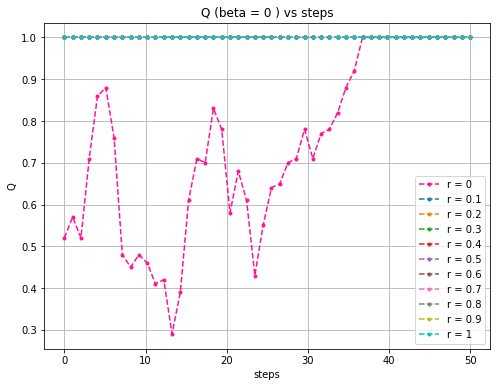

In [211]:
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q (beta = 0 ) vs steps')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Qr0[0][:],'.-',linestyle='dashed',label='r = 0',color = 'deeppink')
plt.plot(time,Qr0[1][:],'.-',linestyle='dashed',label='r = 0.1')
plt.plot(time,Qr0[2][:],'.-',linestyle='dashed',label='r = 0.2')
plt.plot(time,Qr0[3][:],'.-',linestyle='dashed',label='r = 0.3')
plt.plot(time,Qr0[4][:],'.-',linestyle='dashed',label='r = 0.4')
plt.plot(time,Qr0[5][:],'.-',linestyle='dashed',label='r = 0.5')
plt.plot(time,Qr0[6][:],'.-',linestyle='dashed',label='r = 0.6')
plt.plot(time,Qr0[7][:],'.-',linestyle='dashed',label='r = 0.7')
plt.plot(time,Qr0[8][:],'.-',linestyle='dashed',label='r = 0.8')
plt.plot(time,Qr0[9][:],'.-',linestyle='dashed',label='r = 0.9')
plt.plot(time,Qr0[10][:],'.-',linestyle='dashed',label='r = 1')
plt.grid()
plt.legend()

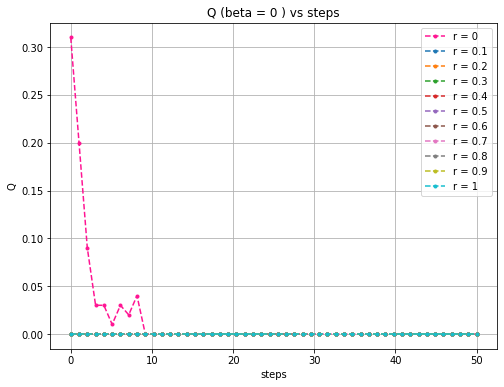

In [228]:
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q (beta = 0 ) vs steps')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Qr0[0][:],'.-',linestyle='dashed',label='r = 0',color = 'deeppink')
plt.plot(time,Qr0[1][:],'.-',linestyle='dashed',label='r = 0.1')
plt.plot(time,Qr0[2][:],'.-',linestyle='dashed',label='r = 0.2')
plt.plot(time,Qr0[3][:],'.-',linestyle='dashed',label='r = 0.3')
plt.plot(time,Qr0[4][:],'.-',linestyle='dashed',label='r = 0.4')
plt.plot(time,Qr0[5][:],'.-',linestyle='dashed',label='r = 0.5')
plt.plot(time,Qr0[6][:],'.-',linestyle='dashed',label='r = 0.6')
plt.plot(time,Qr0[7][:],'.-',linestyle='dashed',label='r = 0.7')
plt.plot(time,Qr0[8][:],'.-',linestyle='dashed',label='r = 0.8')
plt.plot(time,Qr0[9][:],'.-',linestyle='dashed',label='r = 0.9')
plt.plot(time,Qr0[10][:],'.-',linestyle='dashed',label='r = 1')
plt.grid()
plt.legend()

In [213]:
Qr1 =np.zeros([11,Time])
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
R = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]        
for i in range(11):
    payoffi = np.zeros((L,L))
    for t in range(Time):  
        Qr1[i][t],payoffi = play3(payoffi,R[i])

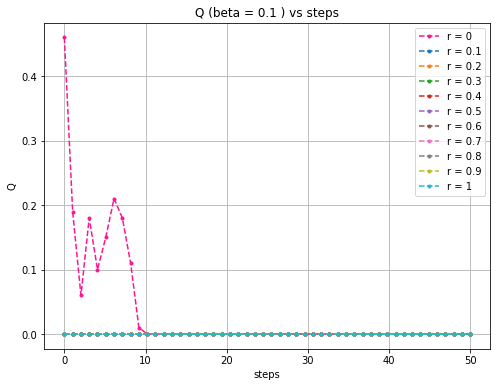

In [214]:
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q (beta = 0.1 ) vs steps')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Qr1[0][:],'.-',linestyle='dashed',label='r = 0',color = 'deeppink')
plt.plot(time,Qr1[1][:],'.-',linestyle='dashed',label='r = 0.1')
plt.plot(time,Qr1[2][:],'.-',linestyle='dashed',label='r = 0.2')
plt.plot(time,Qr1[3][:],'.-',linestyle='dashed',label='r = 0.3')
plt.plot(time,Qr1[4][:],'.-',linestyle='dashed',label='r = 0.4')
plt.plot(time,Qr1[5][:],'.-',linestyle='dashed',label='r = 0.5')
plt.plot(time,Qr1[6][:],'.-',linestyle='dashed',label='r = 0.6')
plt.plot(time,Qr1[7][:],'.-',linestyle='dashed',label='r = 0.7')
plt.plot(time,Qr1[8][:],'.-',linestyle='dashed',label='r = 0.8')
plt.plot(time,Qr1[9][:],'.-',linestyle='dashed',label='r = 0.9')
plt.plot(time,Qr1[10][:],'.-',linestyle='dashed',label='r = 1')
plt.grid()
plt.legend()

In [216]:

Qr2 =np.zeros([11,Time])
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
R = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]        
for i in range(11):
    payoffi = np.zeros((L,L))
    for t in range(Time):  
        Qr2[i][t],payoffi = play3(payoffi,R[i])

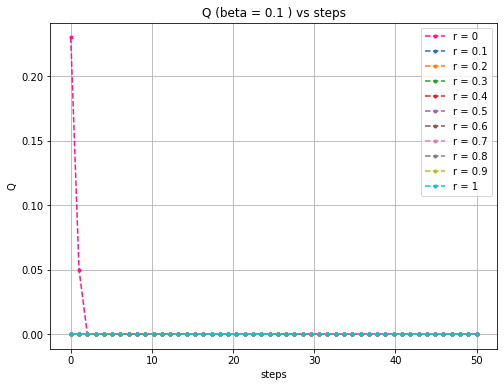

In [217]:
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q (beta = 0.1 ) vs steps')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Qr2[0][:],'.-',linestyle='dashed',label='r = 0',color = 'deeppink')
plt.plot(time,Qr2[1][:],'.-',linestyle='dashed',label='r = 0.1')
plt.plot(time,Qr2[2][:],'.-',linestyle='dashed',label='r = 0.2')
plt.plot(time,Qr2[3][:],'.-',linestyle='dashed',label='r = 0.3')
plt.plot(time,Qr2[4][:],'.-',linestyle='dashed',label='r = 0.4')
plt.plot(time,Qr2[5][:],'.-',linestyle='dashed',label='r = 0.5')
plt.plot(time,Qr2[6][:],'.-',linestyle='dashed',label='r = 0.6')
plt.plot(time,Qr2[7][:],'.-',linestyle='dashed',label='r = 0.7')
plt.plot(time,Qr2[8][:],'.-',linestyle='dashed',label='r = 0.8')
plt.plot(time,Qr2[9][:],'.-',linestyle='dashed',label='r = 0.9')
plt.plot(time,Qr2[10][:],'.-',linestyle='dashed',label='r = 1')
plt.grid()
plt.legend()

In [222]:

Qr3 =np.zeros([11,Time])
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
R = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]        
for i in range(11):
    payoffi = np.zeros((L,L))
    for t in range(Time):  
        Qr3[i][t],payoffi = play3(payoffi,R[i])

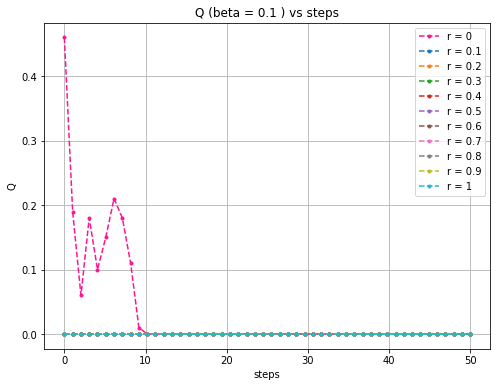

In [223]:
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q (beta = 0.1 ) vs steps')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Qr1[0][:],'.-',linestyle='dashed',label='r = 0',color = 'deeppink')
plt.plot(time,Qr1[1][:],'.-',linestyle='dashed',label='r = 0.1')
plt.plot(time,Qr1[2][:],'.-',linestyle='dashed',label='r = 0.2')
plt.plot(time,Qr1[3][:],'.-',linestyle='dashed',label='r = 0.3')
plt.plot(time,Qr1[4][:],'.-',linestyle='dashed',label='r = 0.4')
plt.plot(time,Qr1[5][:],'.-',linestyle='dashed',label='r = 0.5')
plt.plot(time,Qr1[6][:],'.-',linestyle='dashed',label='r = 0.6')
plt.plot(time,Qr1[7][:],'.-',linestyle='dashed',label='r = 0.7')
plt.plot(time,Qr1[8][:],'.-',linestyle='dashed',label='r = 0.8')
plt.plot(time,Qr1[9][:],'.-',linestyle='dashed',label='r = 0.9')
plt.plot(time,Qr1[10][:],'.-',linestyle='dashed',label='r = 1')
plt.grid()
plt.legend()

In [180]:

Qr4 =np.zeros([11,Time])
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
R = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]        
for i in range(11):
    payoffi = np.zeros((L,L))
    for t in range(Time):  
        Qr4[i][t],payoffi = play3(payoffi,R[i])

In [ ]:
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q (beta = 0.1 ) vs steps')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Qr1[0][:],'.-',linestyle='dashed',label='r = 0',color = 'deeppink')
plt.plot(time,Qr1[1][:],'.-',linestyle='dashed',label='r = 0.1')
plt.plot(time,Qr1[2][:],'.-',linestyle='dashed',label='r = 0.2')
plt.plot(time,Qr1[3][:],'.-',linestyle='dashed',label='r = 0.3')
plt.plot(time,Qr1[4][:],'.-',linestyle='dashed',label='r = 0.4')
plt.plot(time,Qr1[5][:],'.-',linestyle='dashed',label='r = 0.5')
plt.plot(time,Qr1[6][:],'.-',linestyle='dashed',label='r = 0.6')
plt.plot(time,Qr1[7][:],'.-',linestyle='dashed',label='r = 0.7')
plt.plot(time,Qr1[8][:],'.-',linestyle='dashed',label='r = 0.8')
plt.plot(time,Qr1[9][:],'.-',linestyle='dashed',label='r = 0.9')
plt.plot(time,Qr1[10][:],'.-',linestyle='dashed',label='r = 1')
plt.grid()
plt.legend()

In [182]:

Qr5 =np.zeros([11,Time])
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
R = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]        
for i in range(11):
    payoffi = np.zeros((L,L))
    for t in range(Time):  
        Qr5[i][t],payoffi = play3(payoffi,R[i])

In [ ]:
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q (beta = 0.1 ) vs steps')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Qr1[0][:],'.-',linestyle='dashed',label='r = 0',color = 'deeppink')
plt.plot(time,Qr1[1][:],'.-',linestyle='dashed',label='r = 0.1')
plt.plot(time,Qr1[2][:],'.-',linestyle='dashed',label='r = 0.2')
plt.plot(time,Qr1[3][:],'.-',linestyle='dashed',label='r = 0.3')
plt.plot(time,Qr1[4][:],'.-',linestyle='dashed',label='r = 0.4')
plt.plot(time,Qr1[5][:],'.-',linestyle='dashed',label='r = 0.5')
plt.plot(time,Qr1[6][:],'.-',linestyle='dashed',label='r = 0.6')
plt.plot(time,Qr1[7][:],'.-',linestyle='dashed',label='r = 0.7')
plt.plot(time,Qr1[8][:],'.-',linestyle='dashed',label='r = 0.8')
plt.plot(time,Qr1[9][:],'.-',linestyle='dashed',label='r = 0.9')
plt.plot(time,Qr1[10][:],'.-',linestyle='dashed',label='r = 1')
plt.grid()
plt.legend()

In [184]:

Qr6 =np.zeros([11,Time])
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
R = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]        
for i in range(11):
    payoffi = np.zeros((L,L))
    for t in range(Time):  
        Qr6[i][t],payoffi = play3(payoffi,R[i])

In [ ]:
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q (beta = 0.1 ) vs steps')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Qr1[0][:],'.-',linestyle='dashed',label='r = 0',color = 'deeppink')
plt.plot(time,Qr1[1][:],'.-',linestyle='dashed',label='r = 0.1')
plt.plot(time,Qr1[2][:],'.-',linestyle='dashed',label='r = 0.2')
plt.plot(time,Qr1[3][:],'.-',linestyle='dashed',label='r = 0.3')
plt.plot(time,Qr1[4][:],'.-',linestyle='dashed',label='r = 0.4')
plt.plot(time,Qr1[5][:],'.-',linestyle='dashed',label='r = 0.5')
plt.plot(time,Qr1[6][:],'.-',linestyle='dashed',label='r = 0.6')
plt.plot(time,Qr1[7][:],'.-',linestyle='dashed',label='r = 0.7')
plt.plot(time,Qr1[8][:],'.-',linestyle='dashed',label='r = 0.8')
plt.plot(time,Qr1[9][:],'.-',linestyle='dashed',label='r = 0.9')
plt.plot(time,Qr1[10][:],'.-',linestyle='dashed',label='r = 1')
plt.grid()
plt.legend()

In [186]:

Qr7 =np.zeros([11,Time])
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
R = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]        
for i in range(11):
    payoffi = np.zeros((L,L))
    for t in range(Time):  
        Qr7[i][t],payoffi = play3(payoffi,R[i])

In [ ]:
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q (beta = 0.1 ) vs steps')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Qr1[0][:],'.-',linestyle='dashed',label='r = 0',color = 'deeppink')
plt.plot(time,Qr1[1][:],'.-',linestyle='dashed',label='r = 0.1')
plt.plot(time,Qr1[2][:],'.-',linestyle='dashed',label='r = 0.2')
plt.plot(time,Qr1[3][:],'.-',linestyle='dashed',label='r = 0.3')
plt.plot(time,Qr1[4][:],'.-',linestyle='dashed',label='r = 0.4')
plt.plot(time,Qr1[5][:],'.-',linestyle='dashed',label='r = 0.5')
plt.plot(time,Qr1[6][:],'.-',linestyle='dashed',label='r = 0.6')
plt.plot(time,Qr1[7][:],'.-',linestyle='dashed',label='r = 0.7')
plt.plot(time,Qr1[8][:],'.-',linestyle='dashed',label='r = 0.8')
plt.plot(time,Qr1[9][:],'.-',linestyle='dashed',label='r = 0.9')
plt.plot(time,Qr1[10][:],'.-',linestyle='dashed',label='r = 1')
plt.grid()
plt.legend()

In [188]:

Qr8 =np.zeros([11,Time])
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
R = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]        
for i in range(11):
    payoffi = np.zeros((L,L))
    for t in range(Time):  
        Qr8[i][t],payoffi = play3(payoffi,R[i])

In [ ]:
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q (beta = 0.1 ) vs steps')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Qr1[0][:],'.-',linestyle='dashed',label='r = 0',color = 'deeppink')
plt.plot(time,Qr1[1][:],'.-',linestyle='dashed',label='r = 0.1')
plt.plot(time,Qr1[2][:],'.-',linestyle='dashed',label='r = 0.2')
plt.plot(time,Qr1[3][:],'.-',linestyle='dashed',label='r = 0.3')
plt.plot(time,Qr1[4][:],'.-',linestyle='dashed',label='r = 0.4')
plt.plot(time,Qr1[5][:],'.-',linestyle='dashed',label='r = 0.5')
plt.plot(time,Qr1[6][:],'.-',linestyle='dashed',label='r = 0.6')
plt.plot(time,Qr1[7][:],'.-',linestyle='dashed',label='r = 0.7')
plt.plot(time,Qr1[8][:],'.-',linestyle='dashed',label='r = 0.8')
plt.plot(time,Qr1[9][:],'.-',linestyle='dashed',label='r = 0.9')
plt.plot(time,Qr1[10][:],'.-',linestyle='dashed',label='r = 1')
plt.grid()
plt.legend()

In [190]:

Qr9 =np.zeros([11,Time])
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
R = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]        
for i in range(11):
    payoffi = np.zeros((L,L))
    for t in range(Time):  
        Qr9[i][t],payoffi = play3(payoffi,R[i])

In [ ]:
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q (beta = 0.1 ) vs steps')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Qr1[0][:],'.-',linestyle='dashed',label='r = 0',color = 'deeppink')
plt.plot(time,Qr1[1][:],'.-',linestyle='dashed',label='r = 0.1')
plt.plot(time,Qr1[2][:],'.-',linestyle='dashed',label='r = 0.2')
plt.plot(time,Qr1[3][:],'.-',linestyle='dashed',label='r = 0.3')
plt.plot(time,Qr1[4][:],'.-',linestyle='dashed',label='r = 0.4')
plt.plot(time,Qr1[5][:],'.-',linestyle='dashed',label='r = 0.5')
plt.plot(time,Qr1[6][:],'.-',linestyle='dashed',label='r = 0.6')
plt.plot(time,Qr1[7][:],'.-',linestyle='dashed',label='r = 0.7')
plt.plot(time,Qr1[8][:],'.-',linestyle='dashed',label='r = 0.8')
plt.plot(time,Qr1[9][:],'.-',linestyle='dashed',label='r = 0.9')
plt.plot(time,Qr1[10][:],'.-',linestyle='dashed',label='r = 1')
plt.grid()
plt.legend()

In [192]:

Qr10 =np.zeros([11,Time])
payoffi = np.zeros((L,L))
strategy = np.zeros([L,L,2])
for i in range(0,L):
    for j in range(0,L):
        a = random.randint(0, 1)
        strategy[i][j][a]= 1
R = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]        
for i in range(11):
    payoffi = np.zeros((L,L))
    for t in range(Time):  
        Qr10[i][t],payoffi = play3(payoffi,R[i])

In [ ]:
time=np.linspace(0,Time,Time) 
fig = plt.figure(figsize=(8,6))
plt.title('Q (beta = 0.1 ) vs steps')
plt.ylabel('Q')
plt.xlabel('steps')
plt.plot(time,Qr1[0][:],'.-',linestyle='dashed',label='r = 0',color = 'deeppink')
plt.plot(time,Qr1[1][:],'.-',linestyle='dashed',label='r = 0.1')
plt.plot(time,Qr1[2][:],'.-',linestyle='dashed',label='r = 0.2')
plt.plot(time,Qr1[3][:],'.-',linestyle='dashed',label='r = 0.3')
plt.plot(time,Qr1[4][:],'.-',linestyle='dashed',label='r = 0.4')
plt.plot(time,Qr1[5][:],'.-',linestyle='dashed',label='r = 0.5')
plt.plot(time,Qr1[6][:],'.-',linestyle='dashed',label='r = 0.6')
plt.plot(time,Qr1[7][:],'.-',linestyle='dashed',label='r = 0.7')
plt.plot(time,Qr1[8][:],'.-',linestyle='dashed',label='r = 0.8')
plt.plot(time,Qr1[9][:],'.-',linestyle='dashed',label='r = 0.9')
plt.plot(time,Qr1[10][:],'.-',linestyle='dashed',label='r = 1')
plt.grid()
plt.legend()

In [193]:
Qr0_equi = np.zeros(11)
Qr1_equi = np.zeros(11)
Qr2_equi = np.zeros(11)
Qr3_equi = np.zeros(11)
Qr4_equi = np.zeros(11)
Qr5_equi = np.zeros(11)
Qr6_equi = np.zeros(11)
Qr7_equi = np.zeros(11)
Qr8_equi = np.zeros(11)
Qr9_equi = np.zeros(11)
Qr10_equi = np.zeros(11)
for i in range(11):
    Qr0_equi[i] =  Qr0[i][Time -1]#beta = 0
    Qr1_equi[i] =  Qr1[i][Time -1]
    Qr2_equi[i] =  Qr2[i][Time -1]
    Qr3_equi[i] =  Qr3[i][Time -1]
    Qr4_equi[i] =  Qr4[i][Time -1]
    Qr5_equi[i] =  Qr5[i][Time -1]
    Qr6_equi[i] =  Qr6[i][Time -1]
    Qr7_equi[i] =  Qr7[i][Time -1]
    Qr8_equi[i] =  Qr8[i][Time -1]
    Qr9_equi[i] =  Qr9[i][Time -1]
    Qr10_equi[i] =  Qr10[i][Time -1]
    
Beta = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
Qr_equi0=[Qr0_equi[0],Qr1_equi[0],Qr2_equi[0],Qr3_equi[0],Qr4_equi[0],Qr5_equi[0],Qr6_equi[0],Qr7_equi[0],Qr8_equi[0],Qr9_equi[0],Qr10_equi[0]]
Qr_equi1=[Qr0_equi[1],Qr1_equi[1],Qr2_equi[1],Qr3_equi[1],Qr4_equi[1],Qr5_equi[1],Qr6_equi[1],Qr7_equi[1],Qr8_equi[1],Qr9_equi[1],Qr10_equi[1]]
Qr_equi2=[Qr0_equi[2],Qr1_equi[2],Qr2_equi[2],Qr3_equi[2],Qr4_equi[2],Qr5_equi[2],Qr6_equi[2],Qr7_equi[2],Qr8_equi[2],Qr9_equi[2],Qr10_equi[2]]
Qr_equi3=[Qr0_equi[3],Qr1_equi[3],Qr2_equi[3],Qr3_equi[3],Qr4_equi[3],Qr5_equi[3],Qr6_equi[3],Qr7_equi[3],Qr8_equi[3],Qr9_equi[3],Qr10_equi[3]]
Qr_equi4=[Qr0_equi[4],Qr1_equi[4],Qr2_equi[4],Qr3_equi[4],Qr4_equi[4],Qr5_equi[4],Qr6_equi[4],Qr7_equi[4],Qr8_equi[4],Qr9_equi[4],Qr10_equi[4]]
Qr_equi5=[Qr0_equi[5],Qr1_equi[5],Qr2_equi[5],Qr3_equi[5],Qr4_equi[5],Qr5_equi[5],Qr6_equi[5],Qr7_equi[5],Qr8_equi[5],Qr9_equi[5],Qr10_equi[5]]
Qr_equi6=[Qr0_equi[6],Qr1_equi[6],Qr2_equi[6],Qr3_equi[6],Qr4_equi[6],Qr5_equi[6],Qr6_equi[6],Qr7_equi[6],Qr8_equi[6],Qr9_equi[6],Qr10_equi[6]]
Qr_equi7=[Qr0_equi[7],Qr1_equi[7],Qr2_equi[7],Qr3_equi[7],Qr4_equi[7],Qr5_equi[7],Qr6_equi[7],Qr7_equi[7],Qr8_equi[7],Qr9_equi[7],Qr10_equi[7]]
Qr_equi8=[Qr0_equi[8],Qr1_equi[8],Qr2_equi[8],Qr3_equi[8],Qr4_equi[8],Qr5_equi[8],Qr6_equi[8],Qr7_equi[8],Qr8_equi[8],Qr9_equi[8],Qr10_equi[8]]
Qr_equi9=[Qr0_equi[9],Qr1_equi[9],Qr2_equi[9],Qr3_equi[9],Qr4_equi[9],Qr5_equi[9],Qr6_equi[9],Qr7_equi[9],Qr8_equi[9],Qr9_equi[9],Qr10_equi[9]]
Qr_equi10=[Qr0_equi[10],Qr1_equi[10],Qr2_equi[10],Qr3_equi[10],Qr4_equi[10],Qr5_equi[10],Qr6_equi[10],Qr7_equi[10],Qr8_equi[10],Qr9_equi[10],Qr10_equi[10]]

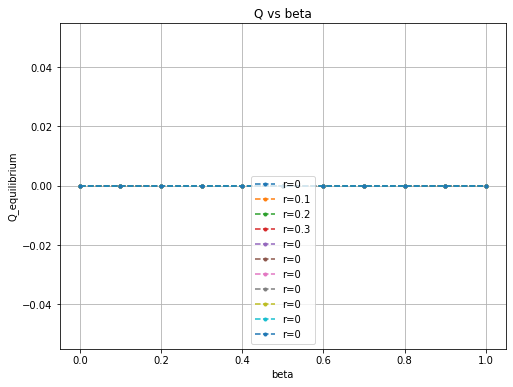

In [229]:
Beta = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
fig = plt.figure(figsize=(8,6))
plt.title('Q vs beta')
plt.ylabel('Q_equilibrium')
plt.xlabel('beta')
plt.plot(Beta,Qr_equi0,'.-',linestyle='dashed',label='r=0')
plt.plot(Beta,Qr_equi1,'.-',linestyle='dashed',label='r=0.1')
plt.plot(Beta,Qr_equi2,'.-',linestyle='dashed',label='r=0.2')
plt.plot(Beta,Qr_equi3,'.-',linestyle='dashed',label='r=0.3')
plt.plot(Beta,Qr_equi4,'.-',linestyle='dashed',label='r=0')
plt.plot(Beta,Qr_equi5,'.-',linestyle='dashed',label='r=0')
plt.plot(Beta,Qr_equi6,'.-',linestyle='dashed',label='r=0')
plt.plot(Beta,Qr_equi7,'.-',linestyle='dashed',label='r=0')
plt.plot(Beta,Qr_equi8,'.-',linestyle='dashed',label='r=0')
plt.plot(Beta,Qr_equi9,'.-',linestyle='dashed',label='r=0')
plt.plot(Beta,Qr_equi10,'.-',linestyle='dashed',label='r=0')

plt.legend()
plt.grid()

In [195]:
Qr0

array([[0.55, 0.45, 0.51, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])